In [1]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

# Data

In [2]:
# CAD asset prices and returns 
CAD = pd.read_csv('df_cad_asset.csv',index_col=0) 
CAD

,XSP.TO_P,XSP.TO_R,XIU.TO_P,XIU.TO_R,XIN.TO_P,XIN.TO_R,XBB.TO_P,XBB.TO_R,XGB.TO_P,XGB.TO_R,XRB.TO_P,XRB.TO_R,XRE.TO_P,XRE.TO_R
DATE,,,,,,,,,,,,,,
2006-04-01,13.145290,NaN,11.521857,NaN,17.995522,NaN,16.917009,NaN,NaN,NaN,14.437650,NaN,6.142775,NaN
2006-05-01,12.707119,-0.033333,11.153104,-0.032005,16.989994,-0.055877,16.982298,0.003859,NaN,NaN,14.296542,-0.009774,6.151716,0.001456
2006-06-01,12.794751,0.006896,11.037451,-0.010370,17.191097,0.011837,16.697371,-0.016778,NaN,NaN,14.051461,-0.017143,6.120422,-0.005087
2006-07-01,12.810687,0.001246,11.291711,0.023036,17.232704,0.002420,17.248827,0.033027,NaN,NaN,14.674636,0.044349,6.482049,0.059085
2006-08-01,13.081561,0.021144,11.542490,0.022209,17.718132,0.028169,17.561024,0.018100,NaN,NaN,14.960310,0.019467,6.672697,0.029412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-01,40.849056,0.027277,26.603353,0.036510,27.332333,0.027902,31.725668,-0.027332,22.031994,-0.031403,25.542923,-0.042799,16.469028,0.038749
2021-03-01,42.650196,0.044093,28.012825,0.052981,28.717251,0.050670,31.317741,-0.012858,21.713200,-0.014470,25.324438,-0.008554,17.255177,0.047735
2021-04-01,44.809574,0.050630,28.658510,0.023050,29.033804,0.011023,31.326403,0.000277,21.741892,0.001321,24.817949,-0.020000,18.062016,0.046759


In [3]:
# US asset prices and returns 
US = pd.read_csv('df_usd_asset.csv',index_col=0) 
US

,SPY_P,SPY_R,QQQ_P,QQQ_R,VWO_P,VWO_R,EWC_P,EWC_R,EFA_P,EFA_R,...,IOO_P,IOO_R,SHY_P,SHY_R,IEF_P,IEF_R,TIP_P,TIP_R,IYR_P,IYR_R
DATE,,,,,,,,,,,,,,,,,,,,,
2006-04-01,96.974480,NaN,36.847321,NaN,24.612864,NaN,18.373472,NaN,43.590206,NaN,...,23.060913,NaN,63.097992,NaN,54.835419,NaN,65.506386,NaN,39.024124,NaN
2006-05-01,94.053520,-0.030121,34.179520,-0.072401,21.833601,-0.112919,17.959595,-0.022526,41.924263,-0.038218,...,22.388222,-0.029170,63.205521,0.001704,54.752041,-0.001521,65.711464,0.003131,37.734303,-0.033052
2006-06-01,93.883881,-0.001804,34.135506,-0.001288,21.813240,-0.000933,17.553099,-0.022634,41.898628,-0.000611,...,22.374704,-0.000604,63.350632,0.002296,54.876812,0.002279,65.952606,0.003670,39.106457,0.036364
2006-07-01,94.721146,0.008918,32.687096,-0.042431,22.217070,0.018513,17.575268,0.001263,42.238224,0.008105,...,22.837812,0.020698,63.763622,0.006519,55.784470,0.016540,66.947205,0.015081,40.909332,0.046102
2006-08-01,96.788200,0.021823,34.246593,0.047710,22.546230,0.014816,18.292179,0.040791,43.314682,0.025485,...,23.510498,0.029455,64.234985,0.007392,56.766102,0.017597,68.059959,0.016621,42.128048,0.029791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-01,377.882019,0.027805,313.380219,-0.001335,52.148872,0.015673,31.972746,0.051307,73.011604,0.022379,...,63.434788,0.017165,86.212044,-0.000926,115.310608,-0.024275,123.544579,-0.016876,86.486145,0.024273
2021-03-01,393.747986,0.041987,318.358154,0.015885,51.711727,-0.008383,33.841217,0.058439,74.846512,0.025132,...,65.427040,0.031406,86.172050,-0.000464,112.565605,-0.023805,123.220581,-0.002623,91.030754,0.052547
2021-04-01,415.939209,0.056359,337.598389,0.060436,52.703548,0.019180,35.391655,0.045815,77.056297,0.029524,...,68.618599,0.048780,86.223999,0.000603,113.690926,0.009997,124.683518,0.011872,98.693626,0.084179


In [4]:
# CAD Asset Returns
CAD_R = pd.read_csv('df_cad_asset_r.csv') 
CAD_R

,DATE,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
0,2006-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-05-01,-0.033333,-0.032005,-0.055877,0.003859,NaN,-0.009774,0.001456
2,2006-06-01,0.006896,-0.010370,0.011837,-0.016778,NaN,-0.017143,-0.005087
3,2006-07-01,0.001246,0.023036,0.002420,0.033027,NaN,0.044349,0.059085
4,2006-08-01,0.021144,0.022209,0.028169,0.018100,NaN,0.019467,0.029412
...,...,...,...,...,...,...,...,...
178,2021-02-01,0.027277,0.036510,0.027902,-0.027332,-0.031403,-0.042799,0.038749
179,2021-03-01,0.044093,0.052981,0.050670,-0.012858,-0.014470,-0.008554,0.047735
180,2021-04-01,0.050630,0.023050,0.011023,0.000277,0.001321,-0.020000,0.046759
181,2021-05-01,0.004219,0.030849,0.022828,0.006002,0.005632,0.034414,0.026318


In [5]:
# US Asset Returns
US_R = pd.read_csv('df_usd_asset_r.csv') 
US_R

,DATE,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
0,2006-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-05-01,-0.030121,-0.072401,-0.112919,-0.022526,-0.038218,-0.029335,-0.029170,0.001704,-0.001521,0.003131,-0.033052
2,2006-06-01,-0.001804,-0.001288,-0.000933,-0.022634,-0.000611,0.010130,-0.000604,0.002296,0.002279,0.003670,0.036364
3,2006-07-01,0.008918,-0.042431,0.018513,0.001263,0.008105,0.010363,0.020698,0.006519,0.016540,0.015081,0.046102
4,2006-08-01,0.021823,0.047710,0.014816,0.040791,0.025485,0.032424,0.029455,0.007392,0.017597,0.016621,0.029791
...,...,...,...,...,...,...,...,...,...,...,...,...
178,2021-02-01,0.027805,-0.001335,0.015673,0.051307,0.022379,0.025796,0.017165,-0.000926,-0.024275,-0.016876,0.024273
179,2021-03-01,0.041987,0.015885,-0.008383,0.058439,0.025132,0.028739,0.031406,-0.000464,-0.023805,-0.002623,0.052547
180,2021-04-01,0.056359,0.060436,0.019180,0.045815,0.029524,0.052289,0.048780,0.000603,0.009997,0.011872,0.084179
181,2021-05-01,0.006566,-0.012012,0.016988,0.063465,0.034823,0.044539,0.010833,0.000684,0.004219,0.008553,0.010082


In [6]:
report_date = '2021-06-01'

# Historical Scenario

## 1. Great Recession : 2007-12 ~ 2009-06

In [7]:
#Select the historical time range for CAD asset

open_day='2007-12-01'
close_day='2009-06-01'
con1=CAD_R['DATE']>=open_day
con2=CAD_R['DATE']<=close_day
Great_recession_cad = CAD_R[con1&con2]
Great_recession_cad

,DATE,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
20,2007-12-01,-0.017838,0.005957,-0.038760,-0.002086,-0.003481,0.017149,-0.035836
21,2008-01-01,-0.050061,-0.040450,-0.085962,0.016032,0.015824,0.002308,-0.037990
22,2008-02-01,-0.030534,0.033592,-0.028688,0.012136,0.009926,0.023404,-0.002242
23,2008-03-01,-0.004240,-0.018750,-0.022363,-0.002399,0.006387,0.040541,-0.006742
24,2008-04-01,0.050487,0.064680,0.062150,0.005007,-0.000715,-0.018482,0.036814
25,2008-05-01,0.010423,0.064462,0.019098,-0.000346,0.000000,0.031552,0.024194
26,2008-06-01,-0.095129,-0.026551,-0.113238,-0.008984,-0.008391,0.016774,-0.068002
27,2008-07-01,0.000103,-0.045418,-0.009269,0.019110,0.017818,0.011825,0.001648
28,2008-08-01,0.016592,0.010027,0.008295,0.005538,0.010381,0.005340,0.048324
29,2008-09-01,-0.082862,-0.129782,-0.090951,-0.030293,-0.028376,-0.097055,-0.104089


In [8]:
Great_recession_cad.to_csv('Great_recession_cad.csv',encoding='utf-8',index=False)

In [9]:
Great_recession_cad=pd.read_csv('Great_recession_cad.csv',index_col=0)
Great_recession_cad

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
DATE,,,,,,,
2007-12-01,-0.017838,0.005957,-0.038760,-0.002086,-0.003481,0.017149,-0.035836
2008-01-01,-0.050061,-0.040450,-0.085962,0.016032,0.015824,0.002308,-0.037990
2008-02-01,-0.030534,0.033592,-0.028688,0.012136,0.009926,0.023404,-0.002242
2008-03-01,-0.004240,-0.018750,-0.022363,-0.002399,0.006387,0.040541,-0.006742
2008-04-01,0.050487,0.064680,0.062150,0.005007,-0.000715,-0.018482,0.036814
2008-05-01,0.010423,0.064462,0.019098,-0.000346,0.000000,0.031552,0.024194
2008-06-01,-0.095129,-0.026551,-0.113238,-0.008984,-0.008391,0.016774,-0.068002
2008-07-01,0.000103,-0.045418,-0.009269,0.019110,0.017818,0.011825,0.001648
2008-08-01,0.016592,0.010027,0.008295,0.005538,0.010381,0.005340,0.048324


In [10]:
# We have calculated the position of each cad asset at report date are 4281.155492, 5687.704412, 6989.969684, 16328.983559, 35942.422838, 33786.437108, 18735.155645

# Use each column multiply the corresponding asset position at the point of 2021-06-01

XSPTO_R=  4281.155492 * Great_recession_cad["XSP.TO_R"]
XSPTO_R = XSPTO_R.to_frame(name='XSP.TO_R')

XIUTO_R=  5687.704412 * Great_recession_cad["XIU.TO_R"]
XIUTO_R = XIUTO_R.to_frame(name='XIU.TO_R')

XINTO_R=  6989.969684 * Great_recession_cad["XIN.TO_R"]
XINTO_R = XINTO_R.to_frame(name='XIN.TO_R')

XBBTO_R=  16328.983559 * Great_recession_cad["XBB.TO_R"]
XBBTO_R = XBBTO_R.to_frame(name='XBB.TO_R')

XGBTO_R=  35942.422838 * Great_recession_cad["XGB.TO_R"]
XGBTO_R = XGBTO_R.to_frame(name='XGB.TO_R')

XRBTO_R=  33786.437108 * Great_recession_cad["XRB.TO_R"]
XRBTO_R = XRBTO_R.to_frame(name='XRB.TO_R')

XRETO_R=  18735.155645 * Great_recession_cad["XRE.TO_R"]
XRETO_R = XRETO_R.to_frame(name='XRE.TO_R')

In [11]:
Great_recession_cad = XSPTO_R.merge(XIUTO_R, on='DATE').merge(XINTO_R, on='DATE').merge(XBBTO_R, on='DATE').merge(XGBTO_R, on='DATE').merge(XRBTO_R, on='DATE').merge(XRETO_R, on='DATE')
Great_recession_cad

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
DATE,,,,,,,
2007-12-01,-76.366288,33.881308,-270.929659,-34.054683,-125.107595,579.416584,-671.386574
2008-01-01,-214.320745,-230.068195,-600.873920,261.790118,568.747256,77.981732,-711.750043
2008-02-01,-130.722257,191.061526,-200.530557,198.172218,356.770348,790.744565,-42.001577
2008-03-01,-18.151312,-106.645129,-156.316846,-39.165851,229.563140,1369.724932,-126.313618
2008-04-01,216.140835,367.882121,434.424694,81.758078,-25.695130,-624.432822,689.713603
2008-05-01,44.621118,366.639960,133.491862,-5.642056,0.000000,1066.036725,453.271086
2008-06-01,-407.262255,-151.012505,-791.528223,-146.694183,-301.599591,566.718594,-1274.036841
2008-07-01,0.440407,-258.323738,-64.793517,312.051056,640.416878,399.529889,30.883368
2008-08-01,71.032889,57.030515,57.981980,90.431609,373.107796,180.409337,905.364275


In [12]:
#Select the historical time range for US asset

open_day='2007-12-01'
close_day='2009-06-01'
con1=US_R['DATE']>=open_day
con2=US_R['DATE']<=close_day
Great_recession_us = US_R[con1&con2]
Great_recession_us

,DATE,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
20,2007-12-01,-0.016480,-0.001754,-0.027778,0.006581,-0.053989,-0.050869,-0.025397,-0.000033,-0.003003,-0.005339,-0.061696
21,2008-01-01,-0.055475,-0.117980,-0.073075,-0.045670,-0.054921,-0.060909,-0.071255,0.023439,0.040856,0.045190,0.012597
22,2008-02-01,-0.025842,-0.048305,0.028770,0.057133,-0.010229,-0.002937,-0.020827,0.007660,0.009229,0.009034,-0.041964
23,2008-03-01,-0.013825,0.017928,-0.036775,-0.053108,0.004190,0.013107,0.006906,0.003248,0.013413,-0.000945,0.033169
24,2008-04-01,0.052849,0.080670,0.084335,0.070934,0.054381,0.040994,0.052263,-0.008526,-0.024474,-0.020817,0.069870
25,2008-05-01,0.015116,0.059310,0.017850,0.078558,0.011872,0.006703,-0.006518,-0.003317,-0.017527,0.008570,0.008130
26,2008-06-01,-0.088137,-0.096781,-0.098092,-0.052842,-0.104810,-0.089887,-0.095132,0.001705,0.011078,0.014225,-0.124424
27,2008-07-01,-0.004029,0.007122,-0.047222,-0.051280,-0.014905,-0.028807,0.008776,0.004391,0.007406,-0.005099,0.035072
28,2008-08-01,0.015454,0.014518,-0.079166,-0.030941,-0.042476,-0.038449,-0.015196,0.004098,0.015142,0.005746,0.018138
29,2008-09-01,-0.099387,-0.156331,-0.155870,-0.132982,-0.114362,-0.128938,-0.078338,0.008161,-0.001264,-0.039145,-0.023333


In [13]:
Great_recession_us.to_csv('Great_recession_us.csv',encoding='utf-8',index=False)

In [14]:
Great_recession_us=pd.read_csv('Great_recession_us.csv',index_col=0)
Great_recession_us

,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
DATE,,,,,,,,,,,
2007-12-01,-0.016480,-0.001754,-0.027778,0.006581,-0.053989,-0.050869,-0.025397,-0.000033,-0.003003,-0.005339,-0.061696
2008-01-01,-0.055475,-0.117980,-0.073075,-0.045670,-0.054921,-0.060909,-0.071255,0.023439,0.040856,0.045190,0.012597
2008-02-01,-0.025842,-0.048305,0.028770,0.057133,-0.010229,-0.002937,-0.020827,0.007660,0.009229,0.009034,-0.041964
2008-03-01,-0.013825,0.017928,-0.036775,-0.053108,0.004190,0.013107,0.006906,0.003248,0.013413,-0.000945,0.033169
2008-04-01,0.052849,0.080670,0.084335,0.070934,0.054381,0.040994,0.052263,-0.008526,-0.024474,-0.020817,0.069870
2008-05-01,0.015116,0.059310,0.017850,0.078558,0.011872,0.006703,-0.006518,-0.003317,-0.017527,0.008570,0.008130
2008-06-01,-0.088137,-0.096781,-0.098092,-0.052842,-0.104810,-0.089887,-0.095132,0.001705,0.011078,0.014225,-0.124424
2008-07-01,-0.004029,0.007122,-0.047222,-0.051280,-0.014905,-0.028807,0.008776,0.004391,0.007406,-0.005099,0.035072
2008-08-01,0.015454,0.014518,-0.079166,-0.030941,-0.042476,-0.038449,-0.015196,0.004098,0.015142,0.005746,0.018138


In [15]:
# Since we calculated the position of each us asset at report date are 2683.842643，2518.447666，2941.990371，1090.113199，3252.875218，2244.345904，3328.173813，15231.961594，15436.154676，30907.651502，23657.994064

# Use each column multiply the corresponding asset position at the point of 2021-06-01

SPY_R=  2683.842643 * Great_recession_us["SPY_R"] / 0.806699 # 0.806699 is the exchange rate of CADUSD
SPY_R = SPY_R.to_frame(name='SPY_R')

QQQ_R=  2518.447666 * Great_recession_us["QQQ_R"] / 0.806699
QQQ_R = QQQ_R.to_frame(name='QQQ_R')

VWO_R=  2941.990371 * Great_recession_us["VWO_R"] / 0.806699
VWO_R = VWO_R.to_frame(name='VWO_R')

EWC_R=  1090.113199 * Great_recession_us["EWC_R"] / 0.806699
EWC_R = EWC_R.to_frame(name='EWC_R')

EFA_R=  3252.875218 * Great_recession_us["EFA_R"] / 0.806699
EFA_R = EFA_R.to_frame(name='EFA_R')

VGK_R=  2244.345904 * Great_recession_us["VGK_R"] / 0.806699
VGK_R = VGK_R.to_frame(name='VGK_R')

IOO_R=  3328.173813 * Great_recession_us["IOO_R"] / 0.806699
IOO_R = IOO_R.to_frame(name='IOO_R')

SHY_R=  15231.961594 * Great_recession_us["SHY_R"] / 0.806699
SHY_R = SHY_R.to_frame(name='SHY_R')

IEF_R=  15436.154676 * Great_recession_us["IEF_R"] / 0.806699
IEF_R = IEF_R.to_frame(name='IEF_R')

TIP_R=  30907.651502 * Great_recession_us["TIP_R"] / 0.806699
TIP_R = TIP_R.to_frame(name='TIP_R')

IYR_R=  23657.994064 * Great_recession_us["IYR_R"] / 0.806699
IYR_R = IYR_R.to_frame(name='IYR_R')

In [16]:
Great_recession_us = SPY_R.merge(QQQ_R, on='DATE').merge(VWO_R, on='DATE').merge(EWC_R, on='DATE').merge(EFA_R, on='DATE').merge(VGK_R, on='DATE').merge(IOO_R, on='DATE').merge(SHY_R, on='DATE').merge(IEF_R, on='DATE').merge(TIP_R, on='DATE').merge(IYR_R, on='DATE')
Great_recession_us

,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
DATE,,,,,,,,,,,
2007-12-01,-54.829187,-5.476443,-101.304284,8.892642,-217.700389,-141.523943,-104.781302,-0.613709,-57.470921,-204.546379,-1809.364661
2008-01-01,-184.561397,-368.325223,-266.501547,-61.714418,-221.460302,-169.457938,-293.975189,442.564787,781.784072,1731.408937,369.427939
2008-02-01,-85.976046,-150.803909,104.923822,77.205656,-41.247795,-8.170592,-85.927213,144.634386,176.602170,346.143291,-1230.688265
2008-03-01,-45.994463,55.969433,-134.117520,-71.766645,16.895290,36.466593,28.491959,61.332918,256.664459,-36.204640,972.755866
2008-04-01,175.826035,251.843655,307.565154,95.854755,219.281893,114.051126,215.620433,-160.991667,-468.314953,-797.595905,2049.063461
2008-05-01,50.290902,185.160760,65.098210,106.157302,47.870201,18.648459,-26.891422,-62.622964,-335.373350,328.330738,238.431085
2008-06-01,-293.225623,-302.141529,-357.736856,-71.406566,-422.628581,-250.079177,-392.482378,32.194821,211.982524,545.020923,-3648.968042
2008-07-01,-13.404591,22.234502,-172.216865,-69.296440,-60.101970,-80.143889,36.207837,82.903476,141.704784,-195.376791,1028.558213
2008-08-01,51.414807,45.325549,-288.713631,-41.811194,-171.276589,-106.971159,-62.693152,77.382237,289.732160,220.157846,531.940025


In [17]:
Great_recession = Great_recession_cad.merge(Great_recession_us, on='DATE')
Great_recession

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
DATE,,,,,,,,,,,,,,,,,,
2007-12-01,-76.366288,33.881308,-270.929659,-34.054683,-125.107595,579.416584,-671.386574,-54.829187,-5.476443,-101.304284,8.892642,-217.700389,-141.523943,-104.781302,-0.613709,-57.470921,-204.546379,-1809.364661
2008-01-01,-214.320745,-230.068195,-600.873920,261.790118,568.747256,77.981732,-711.750043,-184.561397,-368.325223,-266.501547,-61.714418,-221.460302,-169.457938,-293.975189,442.564787,781.784072,1731.408937,369.427939
2008-02-01,-130.722257,191.061526,-200.530557,198.172218,356.770348,790.744565,-42.001577,-85.976046,-150.803909,104.923822,77.205656,-41.247795,-8.170592,-85.927213,144.634386,176.602170,346.143291,-1230.688265
2008-03-01,-18.151312,-106.645129,-156.316846,-39.165851,229.563140,1369.724932,-126.313618,-45.994463,55.969433,-134.117520,-71.766645,16.895290,36.466593,28.491959,61.332918,256.664459,-36.204640,972.755866
2008-04-01,216.140835,367.882121,434.424694,81.758078,-25.695130,-624.432822,689.713603,175.826035,251.843655,307.565154,95.854755,219.281893,114.051126,215.620433,-160.991667,-468.314953,-797.595905,2049.063461
2008-05-01,44.621118,366.639960,133.491862,-5.642056,0.000000,1066.036725,453.271086,50.290902,185.160760,65.098210,106.157302,47.870201,18.648459,-26.891422,-62.622964,-335.373350,328.330738,238.431085
2008-06-01,-407.262255,-151.012505,-791.528223,-146.694183,-301.599591,566.718594,-1274.036841,-293.225623,-302.141529,-357.736856,-71.406566,-422.628581,-250.079177,-392.482378,32.194821,211.982524,545.020923,-3648.968042
2008-07-01,0.440407,-258.323738,-64.793517,312.051056,640.416878,399.529889,30.883368,-13.404591,22.234502,-172.216865,-69.296440,-60.101970,-80.143889,36.207837,82.903476,141.704784,-195.376791,1028.558213
2008-08-01,71.032889,57.030515,57.981980,90.431609,373.107796,180.409337,905.364275,51.414807,45.325549,-288.713631,-41.811194,-171.276589,-106.971159,-62.693152,77.382237,289.732160,220.157846,531.940025


In [18]:
Great_recession["Portfolio"] = Great_recession.sum(axis=1)
Great_recession

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R,Portfolio
DATE,,,,,,,,,,,,,,,,,,,
2007-12-01,-76.366288,33.881308,-270.929659,-34.054683,-125.107595,579.416584,-671.386574,-54.829187,-5.476443,-101.304284,8.892642,-217.700389,-141.523943,-104.781302,-0.613709,-57.470921,-204.546379,-1809.364661,-3253.265482
2008-01-01,-214.320745,-230.068195,-600.873920,261.790118,568.747256,77.981732,-711.750043,-184.561397,-368.325223,-266.501547,-61.714418,-221.460302,-169.457938,-293.975189,442.564787,781.784072,1731.408937,369.427939,910.695924
2008-02-01,-130.722257,191.061526,-200.530557,198.172218,356.770348,790.744565,-42.001577,-85.976046,-150.803909,104.923822,77.205656,-41.247795,-8.170592,-85.927213,144.634386,176.602170,346.143291,-1230.688265,410.189770
2008-03-01,-18.151312,-106.645129,-156.316846,-39.165851,229.563140,1369.724932,-126.313618,-45.994463,55.969433,-134.117520,-71.766645,16.895290,36.466593,28.491959,61.332918,256.664459,-36.204640,972.755866,2293.188568
2008-04-01,216.140835,367.882121,434.424694,81.758078,-25.695130,-624.432822,689.713603,175.826035,251.843655,307.565154,95.854755,219.281893,114.051126,215.620433,-160.991667,-468.314953,-797.595905,2049.063461,3141.995364
2008-05-01,44.621118,366.639960,133.491862,-5.642056,0.000000,1066.036725,453.271086,50.290902,185.160760,65.098210,106.157302,47.870201,18.648459,-26.891422,-62.622964,-335.373350,328.330738,238.431085,2673.518616
2008-06-01,-407.262255,-151.012505,-791.528223,-146.694183,-301.599591,566.718594,-1274.036841,-293.225623,-302.141529,-357.736856,-71.406566,-422.628581,-250.079177,-392.482378,32.194821,211.982524,545.020923,-3648.968042,-7454.885489
2008-07-01,0.440407,-258.323738,-64.793517,312.051056,640.416878,399.529889,30.883368,-13.404591,22.234502,-172.216865,-69.296440,-60.101970,-80.143889,36.207837,82.903476,141.704784,-195.376791,1028.558213,1781.272609
2008-08-01,71.032889,57.030515,57.981980,90.431609,373.107796,180.409337,905.364275,51.414807,45.325549,-288.713631,-41.811194,-171.276589,-106.971159,-62.693152,77.382237,289.732160,220.157846,531.940025,2279.845301


In [19]:
#Replace the first row portfolio value to the one at the report date. 
Great_recession.iloc[0,18] = 121751.82873712645 + 103293.55065003346 / 0.806699 #CAD position sum + USD position sum / exchange rate

In [20]:
Great_recession

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R,Portfolio
DATE,,,,,,,,,,,,,,,,,,,
2007-12-01,-76.366288,33.881308,-270.929659,-34.054683,-125.107595,579.416584,-671.386574,-54.829187,-5.476443,-101.304284,8.892642,-217.700389,-141.523943,-104.781302,-0.613709,-57.470921,-204.546379,-1809.364661,249796.552544
2008-01-01,-214.320745,-230.068195,-600.873920,261.790118,568.747256,77.981732,-711.750043,-184.561397,-368.325223,-266.501547,-61.714418,-221.460302,-169.457938,-293.975189,442.564787,781.784072,1731.408937,369.427939,910.695924
2008-02-01,-130.722257,191.061526,-200.530557,198.172218,356.770348,790.744565,-42.001577,-85.976046,-150.803909,104.923822,77.205656,-41.247795,-8.170592,-85.927213,144.634386,176.602170,346.143291,-1230.688265,410.189770
2008-03-01,-18.151312,-106.645129,-156.316846,-39.165851,229.563140,1369.724932,-126.313618,-45.994463,55.969433,-134.117520,-71.766645,16.895290,36.466593,28.491959,61.332918,256.664459,-36.204640,972.755866,2293.188568
2008-04-01,216.140835,367.882121,434.424694,81.758078,-25.695130,-624.432822,689.713603,175.826035,251.843655,307.565154,95.854755,219.281893,114.051126,215.620433,-160.991667,-468.314953,-797.595905,2049.063461,3141.995364
2008-05-01,44.621118,366.639960,133.491862,-5.642056,0.000000,1066.036725,453.271086,50.290902,185.160760,65.098210,106.157302,47.870201,18.648459,-26.891422,-62.622964,-335.373350,328.330738,238.431085,2673.518616
2008-06-01,-407.262255,-151.012505,-791.528223,-146.694183,-301.599591,566.718594,-1274.036841,-293.225623,-302.141529,-357.736856,-71.406566,-422.628581,-250.079177,-392.482378,32.194821,211.982524,545.020923,-3648.968042,-7454.885489
2008-07-01,0.440407,-258.323738,-64.793517,312.051056,640.416878,399.529889,30.883368,-13.404591,22.234502,-172.216865,-69.296440,-60.101970,-80.143889,36.207837,82.903476,141.704784,-195.376791,1028.558213,1781.272609
2008-08-01,71.032889,57.030515,57.981980,90.431609,373.107796,180.409337,905.364275,51.414807,45.325549,-288.713631,-41.811194,-171.276589,-106.971159,-62.693152,77.382237,289.732160,220.157846,531.940025,2279.845301


In [21]:
# Cumulative Portfolio Value
Great_recession['Portfolio'] = np.cumsum(Great_recession['Portfolio'])
Great_recession

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R,Portfolio
DATE,,,,,,,,,,,,,,,,,,,
2007-12-01,-76.366288,33.881308,-270.929659,-34.054683,-125.107595,579.416584,-671.386574,-54.829187,-5.476443,-101.304284,8.892642,-217.700389,-141.523943,-104.781302,-0.613709,-57.470921,-204.546379,-1809.364661,249796.552544
2008-01-01,-214.320745,-230.068195,-600.873920,261.790118,568.747256,77.981732,-711.750043,-184.561397,-368.325223,-266.501547,-61.714418,-221.460302,-169.457938,-293.975189,442.564787,781.784072,1731.408937,369.427939,250707.248467
2008-02-01,-130.722257,191.061526,-200.530557,198.172218,356.770348,790.744565,-42.001577,-85.976046,-150.803909,104.923822,77.205656,-41.247795,-8.170592,-85.927213,144.634386,176.602170,346.143291,-1230.688265,251117.438238
2008-03-01,-18.151312,-106.645129,-156.316846,-39.165851,229.563140,1369.724932,-126.313618,-45.994463,55.969433,-134.117520,-71.766645,16.895290,36.466593,28.491959,61.332918,256.664459,-36.204640,972.755866,253410.626805
2008-04-01,216.140835,367.882121,434.424694,81.758078,-25.695130,-624.432822,689.713603,175.826035,251.843655,307.565154,95.854755,219.281893,114.051126,215.620433,-160.991667,-468.314953,-797.595905,2049.063461,256552.622169
2008-05-01,44.621118,366.639960,133.491862,-5.642056,0.000000,1066.036725,453.271086,50.290902,185.160760,65.098210,106.157302,47.870201,18.648459,-26.891422,-62.622964,-335.373350,328.330738,238.431085,259226.140786
2008-06-01,-407.262255,-151.012505,-791.528223,-146.694183,-301.599591,566.718594,-1274.036841,-293.225623,-302.141529,-357.736856,-71.406566,-422.628581,-250.079177,-392.482378,32.194821,211.982524,545.020923,-3648.968042,251771.255297
2008-07-01,0.440407,-258.323738,-64.793517,312.051056,640.416878,399.529889,30.883368,-13.404591,22.234502,-172.216865,-69.296440,-60.101970,-80.143889,36.207837,82.903476,141.704784,-195.376791,1028.558213,253552.527906
2008-08-01,71.032889,57.030515,57.981980,90.431609,373.107796,180.409337,905.364275,51.414807,45.325549,-288.713631,-41.811194,-171.276589,-106.971159,-62.693152,77.382237,289.732160,220.157846,531.940025,255832.373207


Text(0, 0.5, 'Portfolio Value')

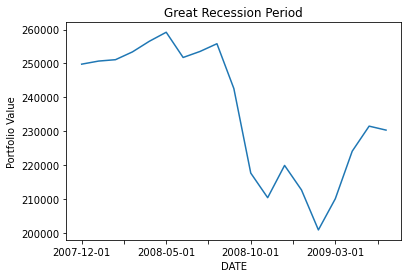

In [22]:
Great_recession["Portfolio"].plot()
plt.title('Great Recession Period')
plt.xlabel('DATE')
plt.ylabel('Portfolio Value')

##  2. Growth Scenario: 2009-03-08 ~ 2010-04-22

In [23]:
open_day='2009-03-08'
close_day='2010-04-22'
con1=CAD_R['DATE']>=open_day
con2=CAD_R['DATE']<=close_day
growth_scenario_cad=CAD_R[con1&con2]
growth_scenario_cad

,DATE,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
36,2009-04-01,0.092455,0.083779,0.098266,0.009797,0.007886,-0.027951,0.110740
37,2009-05-01,0.050584,0.125702,0.052631,0.000000,-0.014017,0.010117,0.143037
38,2009-06-01,-0.012037,-0.013724,-0.030000,0.002400,0.002452,0.010016,0.013172
39,2009-07-01,0.084303,0.050263,0.094972,0.015744,0.010525,0.048166,0.067950
40,2009-08-01,0.033130,-0.001820,0.039497,0.007831,0.008309,-0.007056,0.080042
41,2009-09-01,0.032911,0.035866,0.020150,0.002364,-0.000485,0.002538,0.058710
42,2009-10-01,-0.013889,-0.040629,-0.030474,0.010073,0.007393,0.031393,-0.010885
43,2009-11-01,0.059652,0.059077,0.017462,0.013495,0.013619,0.004909,0.013060
44,2009-12-01,0.007037,0.009297,0.024599,-0.024634,-0.027352,0.003908,0.068140
45,2010-01-01,-0.028141,-0.053515,-0.021739,0.027760,0.027838,0.022395,0.035022


In [24]:
growth_scenario_cad.to_csv('growth_scenario_cad.csv',encoding='utf-8',index=False)

In [25]:
growth_scenario_cad=pd.read_csv('growth_scenario_cad.csv',index_col=0)
growth_scenario_cad

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
DATE,,,,,,,
2009-04-01,0.092455,0.083779,0.098266,0.009797,0.007886,-0.027951,0.110740
2009-05-01,0.050584,0.125702,0.052631,0.000000,-0.014017,0.010117,0.143037
2009-06-01,-0.012037,-0.013724,-0.030000,0.002400,0.002452,0.010016,0.013172
2009-07-01,0.084303,0.050263,0.094972,0.015744,0.010525,0.048166,0.067950
2009-08-01,0.033130,-0.001820,0.039497,0.007831,0.008309,-0.007056,0.080042
2009-09-01,0.032911,0.035866,0.020150,0.002364,-0.000485,0.002538,0.058710
2009-10-01,-0.013889,-0.040629,-0.030474,0.010073,0.007393,0.031393,-0.010885
2009-11-01,0.059652,0.059077,0.017462,0.013495,0.013619,0.004909,0.013060
2009-12-01,0.007037,0.009297,0.024599,-0.024634,-0.027352,0.003908,0.068140


In [26]:
# Since we calculated the position of each cad asset at report date are 4281.155492, 5687.704412, 6989.969684, 16328.983559, 35942.422838, 33786.437108, 18735.155645
# Use each column multiply the corresponding asset position at the point of 2021-06-01

XSPTO_R=  4281.155492 * growth_scenario_cad["XSP.TO_R"]
XSPTO_R = XSPTO_R.to_frame(name='XSP.TO_R')

XIUTO_R=  5687.704412 * growth_scenario_cad["XIU.TO_R"]
XIUTO_R = XIUTO_R.to_frame(name='XIU.TO_R')

XINTO_R=  6989.969684 * growth_scenario_cad["XIN.TO_R"]
XINTO_R = XINTO_R.to_frame(name='XIN.TO_R')

XBBTO_R=  16328.983559 * growth_scenario_cad["XBB.TO_R"]
XBBTO_R = XBBTO_R.to_frame(name='XBB.TO_R')

XGBTO_R=  35942.422838 * growth_scenario_cad["XGB.TO_R"]
XGBTO_R = XGBTO_R.to_frame(name='XGB.TO_R')

XRBTO_R=  33786.437108 * growth_scenario_cad["XRB.TO_R"]
XRBTO_R = XRBTO_R.to_frame(name='XRB.TO_R')

XRETO_R=  18735.155645 * growth_scenario_cad["XRE.TO_R"]
XRETO_R = XRETO_R.to_frame(name='XRE.TO_R')

In [27]:
growth_scenario_cad = XSPTO_R.merge(XIUTO_R, on='DATE').merge(XINTO_R, on='DATE').merge(XBBTO_R, on='DATE').merge(XGBTO_R, on='DATE').merge(XRBTO_R, on='DATE').merge(XRETO_R, on='DATE')
growth_scenario_cad

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
DATE,,,,,,,
2009-04-01,395.812912,476.510404,686.875564,159.968912,283.425341,-944.359264,2074.740166
2009-05-01,216.556998,714.957663,367.891946,0.000000,-503.806558,341.827554,2679.819990
2009-06-01,-51.533116,-78.059068,-209.699237,39.194672,88.125969,338.408029,246.773475
2009-07-01,360.913896,285.881889,663.850793,257.087256,378.288932,1627.358374,1273.059184
2009-08-01,141.834964,-10.352413,276.084468,127.878900,298.657380,-238.413318,1499.598391
2009-09-01,140.897340,203.997646,140.845939,38.597439,-17.444152,85.747579,1099.942637
2009-10-01,-59.459620,-231.086545,-213.012238,164.489575,265.713346,1060.645457,-203.927279
2009-11-01,255.379295,336.012912,122.060298,220.366720,489.497916,165.858262,244.682650
2009-12-01,30.125763,52.879487,171.948193,-402.247952,-983.083671,132.047735,1276.617403


In [28]:
#Select the historical time range for US asset

open_day='2009-03-08'
close_day='2010-04-22'
con1=US_R['DATE']>=open_day
con2=US_R['DATE']<=close_day
growth_scenario_us = US_R[con1&con2]
growth_scenario_us

,DATE,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
36,2009-04-01,0.107214,0.132476,0.174448,0.138518,0.115190,0.131662,0.090414,-0.001789,-0.027659,-0.022481,0.325360
37,2009-05-01,0.058454,0.032089,0.178894,0.232658,0.131918,0.142659,0.102887,0.000245,-0.020903,0.018337,0.022727
38,2009-06-01,-0.006268,0.028265,-0.024525,-0.072727,-0.034562,-0.023515,-0.029522,-0.000516,-0.005556,0.004562,-0.039408
39,2009-07-01,0.080676,0.085721,0.109051,0.134752,0.123796,0.113456,0.118234,0.001325,0.008515,0.000695,0.122542
40,2009-08-01,0.036940,0.014702,-0.007085,-0.017355,0.045030,0.054850,0.040051,0.004090,0.007516,0.008003,0.131939
41,2009-09-01,0.030549,0.055459,0.099601,0.071488,0.037965,0.048193,0.038688,0.002415,0.011335,0.015304,0.051503
42,2009-10-01,-0.014554,-0.029594,-0.024137,-0.063971,-0.025238,-0.025811,-0.011500,0.001407,-0.001313,0.020208,-0.041178
43,2009-11-01,0.061607,0.063476,0.071808,0.086373,0.039212,0.045332,0.055218,0.004934,0.014410,0.025081,0.070776
44,2009-12-01,0.013644,0.050275,0.017370,0.016210,-0.001986,-0.040000,-0.008557,-0.014016,-0.039889,-0.021838,0.057577
45,2010-01-01,-0.031154,-0.063139,-0.054658,-0.063046,-0.042012,-0.025966,-0.046400,0.015988,0.027893,0.019638,-0.043957


In [29]:
growth_scenario_us.to_csv('growth_scenario_us.csv',encoding='utf-8',index=False)

In [30]:
growth_scenario_us=pd.read_csv('growth_scenario_us.csv',index_col=0)
growth_scenario_us

,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
DATE,,,,,,,,,,,
2009-04-01,0.107214,0.132476,0.174448,0.138518,0.115190,0.131662,0.090414,-0.001789,-0.027659,-0.022481,0.325360
2009-05-01,0.058454,0.032089,0.178894,0.232658,0.131918,0.142659,0.102887,0.000245,-0.020903,0.018337,0.022727
2009-06-01,-0.006268,0.028265,-0.024525,-0.072727,-0.034562,-0.023515,-0.029522,-0.000516,-0.005556,0.004562,-0.039408
2009-07-01,0.080676,0.085721,0.109051,0.134752,0.123796,0.113456,0.118234,0.001325,0.008515,0.000695,0.122542
2009-08-01,0.036940,0.014702,-0.007085,-0.017355,0.045030,0.054850,0.040051,0.004090,0.007516,0.008003,0.131939
2009-09-01,0.030549,0.055459,0.099601,0.071488,0.037965,0.048193,0.038688,0.002415,0.011335,0.015304,0.051503
2009-10-01,-0.014554,-0.029594,-0.024137,-0.063971,-0.025238,-0.025811,-0.011500,0.001407,-0.001313,0.020208,-0.041178
2009-11-01,0.061607,0.063476,0.071808,0.086373,0.039212,0.045332,0.055218,0.004934,0.014410,0.025081,0.070776
2009-12-01,0.013644,0.050275,0.017370,0.016210,-0.001986,-0.040000,-0.008557,-0.014016,-0.039889,-0.021838,0.057577


In [31]:
# We have calculated the position of each us asset at report date are 2683.842643，2518.447666，2941.990371，1090.113199，3252.875218，2244.345904，3328.173813，15231.961594，15436.154676，30907.651502，23657.994064

# Use each column multiply the corresponding asset position at the point of 2021-06-01

SPY_R=  2683.842643 * growth_scenario_us["SPY_R"] / 0.806699 # 0.806699 is the exchange rate of CADUSD
SPY_R = SPY_R.to_frame(name='SPY_R')

QQQ_R=  2518.447666 * growth_scenario_us["QQQ_R"] / 0.806699
QQQ_R = QQQ_R.to_frame(name='QQQ_R')

VWO_R=  2941.990371 * growth_scenario_us["VWO_R"] / 0.806699
VWO_R = VWO_R.to_frame(name='VWO_R')

EWC_R=  1090.113199 * growth_scenario_us["EWC_R"] / 0.806699
EWC_R = EWC_R.to_frame(name='EWC_R')

EFA_R=  3252.875218 * growth_scenario_us["EFA_R"] / 0.806699
EFA_R = EFA_R.to_frame(name='EFA_R')

VGK_R=  2244.345904 * growth_scenario_us["VGK_R"] / 0.806699
VGK_R = VGK_R.to_frame(name='VGK_R')

IOO_R=  3328.173813 * growth_scenario_us["IOO_R"] / 0.806699
IOO_R = IOO_R.to_frame(name='IOO_R')

SHY_R=  15231.961594 * growth_scenario_us["SHY_R"] / 0.806699
SHY_R = SHY_R.to_frame(name='SHY_R')

IEF_R=  15436.154676 * growth_scenario_us["IEF_R"] / 0.806699
IEF_R = IEF_R.to_frame(name='IEF_R')

TIP_R=  30907.651502 * growth_scenario_us["TIP_R"] / 0.806699
TIP_R = TIP_R.to_frame(name='TIP_R')

IYR_R=  23657.994064 * growth_scenario_us["IYR_R"] / 0.806699
IYR_R = IYR_R.to_frame(name='IYR_R')

In [32]:
growth_scenario_us = SPY_R.merge(QQQ_R, on='DATE').merge(VWO_R, on='DATE').merge(EWC_R, on='DATE').merge(EFA_R, on='DATE').merge(VGK_R, on='DATE').merge(IOO_R, on='DATE').merge(SHY_R, on='DATE').merge(IEF_R, on='DATE').merge(TIP_R, on='DATE').merge(IYR_R, on='DATE')
growth_scenario_us

,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
DATE,,,,,,,,,,,
2009-04-01,356.695895,413.579689,636.203088,187.182564,464.485161,366.300210,373.016659,-33.772286,-529.249206,-861.345975,9541.806255
2009-05-01,194.473212,100.178731,652.419008,314.396474,531.936170,396.897535,424.478042,4.629733,-399.973058,702.574624,666.523590
2009-06-01,-20.854232,88.239501,-89.441213,-98.278371,-139.366730,-65.422224,-121.796836,-9.742274,-106.319053,174.773350,-1155.702771
2009-07-01,268.403008,267.612554,397.703398,182.094482,499.186229,315.649208,487.794117,25.016984,162.926490,26.632452,3593.771237
2009-08-01,122.896384,45.898514,-25.837119,-23.452680,181.577538,152.598859,165.239228,77.236092,143.825875,306.608114,3869.363337
2009-09-01,101.634436,173.136886,363.239085,96.603858,153.088453,134.078250,159.614801,45.590902,216.895138,586.355504,1510.420153
2009-10-01,-48.419476,-92.390296,-88.026777,-86.445945,-101.767499,-71.811037,-47.447036,26.573811,-25.117852,774.227132,-1207.625960
2009-11-01,204.961900,198.168292,261.881782,116.718220,158.116533,126.120375,227.811333,93.164019,275.734170,960.956206,2075.649777
2009-12-01,45.391654,156.955313,63.347572,21.904343,-8.007789,-111.285978,-35.302330,-264.654594,-763.270001,-836.695531,1688.563016


In [37]:
growth_scenario = growth_scenario_cad.merge(growth_scenario_us, on='DATE')
growth_scenario

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
DATE,,,,,,,,,,,,,,,,,,
2009-04-01,395.812912,476.510404,686.875564,159.968912,283.425341,-944.359264,2074.740166,356.695895,413.579689,636.203088,187.182564,464.485161,366.300210,373.016659,-33.772286,-529.249206,-861.345975,9541.806255
2009-05-01,216.556998,714.957663,367.891946,0.000000,-503.806558,341.827554,2679.819990,194.473212,100.178731,652.419008,314.396474,531.936170,396.897535,424.478042,4.629733,-399.973058,702.574624,666.523590
2009-06-01,-51.533116,-78.059068,-209.699237,39.194672,88.125969,338.408029,246.773475,-20.854232,88.239501,-89.441213,-98.278371,-139.366730,-65.422224,-121.796836,-9.742274,-106.319053,174.773350,-1155.702771
2009-07-01,360.913896,285.881889,663.850793,257.087256,378.288932,1627.358374,1273.059184,268.403008,267.612554,397.703398,182.094482,499.186229,315.649208,487.794117,25.016984,162.926490,26.632452,3593.771237
2009-08-01,141.834964,-10.352413,276.084468,127.878900,298.657380,-238.413318,1499.598391,122.896384,45.898514,-25.837119,-23.452680,181.577538,152.598859,165.239228,77.236092,143.825875,306.608114,3869.363337
2009-09-01,140.897340,203.997646,140.845939,38.597439,-17.444152,85.747579,1099.942637,101.634436,173.136886,363.239085,96.603858,153.088453,134.078250,159.614801,45.590902,216.895138,586.355504,1510.420153
2009-10-01,-59.459620,-231.086545,-213.012238,164.489575,265.713346,1060.645457,-203.927279,-48.419476,-92.390296,-88.026777,-86.445945,-101.767499,-71.811037,-47.447036,26.573811,-25.117852,774.227132,-1207.625960
2009-11-01,255.379295,336.012912,122.060298,220.366720,489.497916,165.858262,244.682650,204.961900,198.168292,261.881782,116.718220,158.116533,126.120375,227.811333,93.164019,275.734170,960.956206,2075.649777
2009-12-01,30.125763,52.879487,171.948193,-402.247952,-983.083671,132.047735,1276.617403,45.391654,156.955313,63.347572,21.904343,-8.007789,-111.285978,-35.302330,-264.654594,-763.270001,-836.695531,1688.563016


In [38]:
growth_scenario["Portfolio"] = growth_scenario.sum(axis=1)
growth_scenario

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R,Portfolio
DATE,,,,,,,,,,,,,,,,,,,
2009-04-01,395.812912,476.510404,686.875564,159.968912,283.425341,-944.359264,2074.740166,356.695895,413.579689,636.203088,187.182564,464.485161,366.300210,373.016659,-33.772286,-529.249206,-861.345975,9541.806255,14047.876090
2009-05-01,216.556998,714.957663,367.891946,0.000000,-503.806558,341.827554,2679.819990,194.473212,100.178731,652.419008,314.396474,531.936170,396.897535,424.478042,4.629733,-399.973058,702.574624,666.523590,7405.781653
2009-06-01,-51.533116,-78.059068,-209.699237,39.194672,88.125969,338.408029,246.773475,-20.854232,88.239501,-89.441213,-98.278371,-139.366730,-65.422224,-121.796836,-9.742274,-106.319053,174.773350,-1155.702771,-1170.700133
2009-07-01,360.913896,285.881889,663.850793,257.087256,378.288932,1627.358374,1273.059184,268.403008,267.612554,397.703398,182.094482,499.186229,315.649208,487.794117,25.016984,162.926490,26.632452,3593.771237,11073.230483
2009-08-01,141.834964,-10.352413,276.084468,127.878900,298.657380,-238.413318,1499.598391,122.896384,45.898514,-25.837119,-23.452680,181.577538,152.598859,165.239228,77.236092,143.825875,306.608114,3869.363337,7111.242517
2009-09-01,140.897340,203.997646,140.845939,38.597439,-17.444152,85.747579,1099.942637,101.634436,173.136886,363.239085,96.603858,153.088453,134.078250,159.614801,45.590902,216.895138,586.355504,1510.420153,5233.241893
2009-10-01,-59.459620,-231.086545,-213.012238,164.489575,265.713346,1060.645457,-203.927279,-48.419476,-92.390296,-88.026777,-86.445945,-101.767499,-71.811037,-47.447036,26.573811,-25.117852,774.227132,-1207.625960,-184.888238
2009-11-01,255.379295,336.012912,122.060298,220.366720,489.497916,165.858262,244.682650,204.961900,198.168292,261.881782,116.718220,158.116533,126.120375,227.811333,93.164019,275.734170,960.956206,2075.649777,6533.140658
2009-12-01,30.125763,52.879487,171.948193,-402.247952,-983.083671,132.047735,1276.617403,45.391654,156.955313,63.347572,21.904343,-8.007789,-111.285978,-35.302330,-264.654594,-763.270001,-836.695531,1688.563016,235.232633


In [41]:
#Replace the first row portfolio value to the one at the report date. 
growth_scenario.iloc[0,18] = 121751.82873712645 + 103293.55065003346 / 0.806699 #CAD position sum + USD position sum / exchange rate

In [42]:
# Cumulative Portfolio Value
growth_scenario['Portfolio'] = np.cumsum(growth_scenario['Portfolio'])
growth_scenario

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R,Portfolio
DATE,,,,,,,,,,,,,,,,,,,
2009-04-01,395.812912,476.510404,686.875564,159.968912,283.425341,-944.359264,2074.740166,356.695895,413.579689,636.203088,187.182564,464.485161,366.300210,373.016659,-33.772286,-529.249206,-861.345975,9541.806255,249796.552544
2009-05-01,216.556998,714.957663,367.891946,0.000000,-503.806558,341.827554,2679.819990,194.473212,100.178731,652.419008,314.396474,531.936170,396.897535,424.478042,4.629733,-399.973058,702.574624,666.523590,257202.334197
2009-06-01,-51.533116,-78.059068,-209.699237,39.194672,88.125969,338.408029,246.773475,-20.854232,88.239501,-89.441213,-98.278371,-139.366730,-65.422224,-121.796836,-9.742274,-106.319053,174.773350,-1155.702771,256031.634064
2009-07-01,360.913896,285.881889,663.850793,257.087256,378.288932,1627.358374,1273.059184,268.403008,267.612554,397.703398,182.094482,499.186229,315.649208,487.794117,25.016984,162.926490,26.632452,3593.771237,267104.864547
2009-08-01,141.834964,-10.352413,276.084468,127.878900,298.657380,-238.413318,1499.598391,122.896384,45.898514,-25.837119,-23.452680,181.577538,152.598859,165.239228,77.236092,143.825875,306.608114,3869.363337,274216.107065
2009-09-01,140.897340,203.997646,140.845939,38.597439,-17.444152,85.747579,1099.942637,101.634436,173.136886,363.239085,96.603858,153.088453,134.078250,159.614801,45.590902,216.895138,586.355504,1510.420153,279449.348958
2009-10-01,-59.459620,-231.086545,-213.012238,164.489575,265.713346,1060.645457,-203.927279,-48.419476,-92.390296,-88.026777,-86.445945,-101.767499,-71.811037,-47.447036,26.573811,-25.117852,774.227132,-1207.625960,279264.460720
2009-11-01,255.379295,336.012912,122.060298,220.366720,489.497916,165.858262,244.682650,204.961900,198.168292,261.881782,116.718220,158.116533,126.120375,227.811333,93.164019,275.734170,960.956206,2075.649777,285797.601379
2009-12-01,30.125763,52.879487,171.948193,-402.247952,-983.083671,132.047735,1276.617403,45.391654,156.955313,63.347572,21.904343,-8.007789,-111.285978,-35.302330,-264.654594,-763.270001,-836.695531,1688.563016,286032.834012


Text(0, 0.5, 'Portfolio Value')

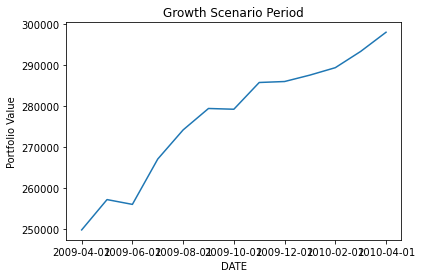

In [43]:
growth_scenario["Portfolio"].plot()
plt.title('Growth Scenario Period')
plt.xlabel('DATE')
plt.ylabel('Portfolio Value')

## 3.  2015-2016 Growth Scare: 2015-07 ~ 2016-01

In [44]:
open_day='2015-07-01'
close_day='2016-01-01'
con1=CAD_R['DATE']>=open_day
con2=CAD_R['DATE']<=close_day
growth_scare_cad = CAD_R[con1&con2]
growth_scare_cad

,DATE,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
111,2015-07-01,0.032855,0.016215,0.053342,0.017291,0.013946,0.026642,0.005533
112,2015-08-01,-0.062423,-0.045581,-0.080418,-0.012011,-0.008945,-0.032051,-0.054291
113,2015-09-01,-0.026719,-0.038987,-0.042414,-0.002418,-0.005602,0.000828,0.017110
114,2015-10-01,0.082358,0.022659,0.068036,-0.003053,-0.001053,-0.019024,0.007168
115,2015-11-01,0.004574,-0.001499,0.017529,0.001108,-0.001108,0.008853,-0.010731
116,2015-12-01,-0.029801,-0.038038,-0.045378,0.011656,0.012662,0.013373,-0.034124
117,2016-01-01,-0.042112,-0.008059,-0.034896,0.002059,0.005715,0.002320,0.007495


In [45]:
growth_scare_cad.to_csv('growth_scare_cad.csv',encoding='utf-8',index=False)

In [47]:
growth_scare_cad=pd.read_csv('growth_scare_cad.csv',index_col=0)
growth_scare_cad

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
DATE,,,,,,,
2015-07-01,0.032855,0.016215,0.053342,0.017291,0.013946,0.026642,0.005533
2015-08-01,-0.062423,-0.045581,-0.080418,-0.012011,-0.008945,-0.032051,-0.054291
2015-09-01,-0.026719,-0.038987,-0.042414,-0.002418,-0.005602,0.000828,0.017110
2015-10-01,0.082358,0.022659,0.068036,-0.003053,-0.001053,-0.019024,0.007168
2015-11-01,0.004574,-0.001499,0.017529,0.001108,-0.001108,0.008853,-0.010731
2015-12-01,-0.029801,-0.038038,-0.045378,0.011656,0.012662,0.013373,-0.034124
2016-01-01,-0.042112,-0.008059,-0.034896,0.002059,0.005715,0.002320,0.007495


In [48]:
# Since we calculated the position of each cad asset at report date are 4281.155492, 5687.704412, 6989.969684, 16328.983559, 35942.422838, 33786.437108, 18735.155645
# Use each column multiply the corresponding asset position at the point of 2021-06-01

XSPTO_R=  4281.155492 * growth_scare_cad["XSP.TO_R"]
XSPTO_R = XSPTO_R.to_frame(name='XSP.TO_R')

XIUTO_R=  5687.704412 * growth_scare_cad["XIU.TO_R"]
XIUTO_R = XIUTO_R.to_frame(name='XIU.TO_R')

XINTO_R=  6989.969684 * growth_scare_cad["XIN.TO_R"]
XINTO_R = XINTO_R.to_frame(name='XIN.TO_R')

XBBTO_R=  16328.983559 * growth_scare_cad["XBB.TO_R"]
XBBTO_R = XBBTO_R.to_frame(name='XBB.TO_R')

XGBTO_R=  35942.422838 * growth_scare_cad["XGB.TO_R"]
XGBTO_R = XGBTO_R.to_frame(name='XGB.TO_R')

XRBTO_R=  33786.437108 * growth_scare_cad["XRB.TO_R"]
XRBTO_R = XRBTO_R.to_frame(name='XRB.TO_R')

XRETO_R=  18735.155645 * growth_scare_cad["XRE.TO_R"]
XRETO_R = XRETO_R.to_frame(name='XRE.TO_R')

In [49]:
growth_scare_cad = XSPTO_R.merge(XIUTO_R, on='DATE').merge(XINTO_R, on='DATE').merge(XBBTO_R, on='DATE').merge(XGBTO_R, on='DATE').merge(XRBTO_R, on='DATE').merge(XRETO_R, on='DATE')
growth_scare_cad

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
DATE,,,,,,,
2015-07-01,140.658370,92.224552,372.861570,282.343671,501.263057,900.126804,103.664070
2015-08-01,-267.242852,-259.252813,-562.120997,-196.129430,-321.520859,-1082.900853,-1017.154794
2015-09-01,-114.390261,-221.744257,-296.470358,-39.480135,-201.347224,27.968007,320.562466
2015-10-01,352.589027,128.878036,475.572926,-49.844516,-37.841189,-642.746929,134.285109
2015-11-01,19.581628,-8.528593,122.526955,18.093951,-39.832795,299.118963,-201.046150
2015-12-01,-127.584847,-216.347956,-317.192746,190.332363,455.102347,451.809772,-639.315435
2016-01-01,-180.289788,-45.839917,-243.919955,33.623500,205.423886,78.397576,140.426418


In [50]:
#Select the historical time range for US asset
open_day='2015-07-01'
close_day='2016-01-01'
con1=US_R['DATE']>=open_day
con2=US_R['DATE']<=close_day
growth_scare_us = US_R[con1&con2]
growth_scare_us

,DATE,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
111,2015-07-01,0.027564,0.047983,-0.053932,-0.034628,0.037546,0.042748,0.031721,0.000436,0.015223,0.005355,0.058938
112,2015-08-01,-0.060950,-0.068245,-0.098643,-0.050098,-0.074251,-0.070192,-0.068473,-0.000495,0.000792,-0.009498,-0.058132
113,2015-09-01,-0.030556,-0.024446,-0.041980,-0.052328,-0.044189,-0.045604,-0.027547,0.002926,0.015763,-0.007977,0.006669
114,2015-10-01,0.090701,0.116408,0.067353,0.034783,0.066120,0.063855,0.091198,-0.001412,-0.006320,0.005214,0.072164
115,2015-11-01,0.003655,0.006088,-0.022962,-0.022269,-0.007527,-0.012481,-0.003841,-0.002595,-0.004280,-0.000882,-0.001991
116,2015-12-01,-0.023097,-0.018944,-0.039072,-0.076064,-0.031822,-0.030138,-0.031644,-0.002001,-0.006099,-0.010109,-0.001728
117,2016-01-01,-0.044132,-0.066261,-0.052861,-0.014225,-0.046879,-0.051650,-0.043208,0.007521,0.036546,0.015682,-0.028745


In [51]:
growth_scare_us.to_csv('growth_scare_us.csv',encoding='utf-8',index=False)

In [52]:
growth_scare_us=pd.read_csv('growth_scare_us.csv',index_col=0)
growth_scare_us

,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
DATE,,,,,,,,,,,
2015-07-01,0.027564,0.047983,-0.053932,-0.034628,0.037546,0.042748,0.031721,0.000436,0.015223,0.005355,0.058938
2015-08-01,-0.060950,-0.068245,-0.098643,-0.050098,-0.074251,-0.070192,-0.068473,-0.000495,0.000792,-0.009498,-0.058132
2015-09-01,-0.030556,-0.024446,-0.041980,-0.052328,-0.044189,-0.045604,-0.027547,0.002926,0.015763,-0.007977,0.006669
2015-10-01,0.090701,0.116408,0.067353,0.034783,0.066120,0.063855,0.091198,-0.001412,-0.006320,0.005214,0.072164
2015-11-01,0.003655,0.006088,-0.022962,-0.022269,-0.007527,-0.012481,-0.003841,-0.002595,-0.004280,-0.000882,-0.001991
2015-12-01,-0.023097,-0.018944,-0.039072,-0.076064,-0.031822,-0.030138,-0.031644,-0.002001,-0.006099,-0.010109,-0.001728
2016-01-01,-0.044132,-0.066261,-0.052861,-0.014225,-0.046879,-0.051650,-0.043208,0.007521,0.036546,0.015682,-0.028745


In [53]:
# Since we calculated the position of each us asset at report date are 2683.842643，2518.447666，2941.990371，1090.113199，3252.875218，2244.345904，3328.173813，15231.961594，15436.154676，30907.651502，23657.994064

# Use each column multiply the corresponding asset position at the point of 2021-06-01

SPY_R=  2683.842643 * growth_scare_us["SPY_R"] / 0.806699 # 0.806699 is the exchange rate of CADUSD
SPY_R = SPY_R.to_frame(name='SPY_R')

QQQ_R=  2518.447666 * growth_scare_us["QQQ_R"] / 0.806699
QQQ_R = QQQ_R.to_frame(name='QQQ_R')

VWO_R=  2941.990371 * growth_scare_us["VWO_R"] / 0.806699
VWO_R = VWO_R.to_frame(name='VWO_R')

EWC_R=  1090.113199 * growth_scare_us["EWC_R"] / 0.806699
EWC_R = EWC_R.to_frame(name='EWC_R')

EFA_R=  3252.875218 * growth_scare_us["EFA_R"] / 0.806699
EFA_R = EFA_R.to_frame(name='EFA_R')

VGK_R=  2244.345904 * growth_scare_us["VGK_R"] / 0.806699
VGK_R = VGK_R.to_frame(name='VGK_R')

IOO_R=  3328.173813 * growth_scare_us["IOO_R"] / 0.806699
IOO_R = IOO_R.to_frame(name='IOO_R')

SHY_R=  15231.961594 * growth_scare_us["SHY_R"] / 0.806699
SHY_R = SHY_R.to_frame(name='SHY_R')

IEF_R=  15436.154676 * growth_scare_us["IEF_R"] / 0.806699
IEF_R = IEF_R.to_frame(name='IEF_R')

TIP_R=  30907.651502 * growth_scare_us["TIP_R"] / 0.806699
TIP_R = TIP_R.to_frame(name='TIP_R')

IYR_R=  23657.994064 * growth_scare_us["IYR_R"] / 0.806699
IYR_R = IYR_R.to_frame(name='IYR_R')

In [54]:
growth_scare_us = SPY_R.merge(QQQ_R, on='DATE').merge(VWO_R, on='DATE').merge(EWC_R, on='DATE').merge(EFA_R, on='DATE').merge(VGK_R, on='DATE').merge(IOO_R, on='DATE').merge(SHY_R, on='DATE').merge(IEF_R, on='DATE').merge(TIP_R, on='DATE').merge(IYR_R, on='DATE')
growth_scare_us

,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
DATE,,,,,,,,,,,
2015-07-01,91.702359,149.797447,-196.686928,-46.793275,151.396577,118.931793,130.869023,8.235258,291.284293,205.168823,1728.462667
2015-08-01,-202.777801,-213.054212,-359.745803,-67.698177,-299.405281,-195.282499,-282.498590,-9.347058,15.157703,-363.921822,-1704.824029
2015-09-01,-101.657970,-76.319149,-153.100366,-70.712376,-178.183943,-126.877433,-113.651472,55.243544,301.616120,-305.612609,195.567480
2015-10-01,301.756676,363.417160,245.633233,47.002638,266.617584,177.653453,376.253425,-26.651774,-120.933553,199.766970,2116.357853
2015-11-01,12.160351,19.007086,-83.740590,-30.092303,-30.352880,-34.722834,-15.847032,-49.003643,-81.891055,-33.794553,-58.380799
2015-12-01,-76.841062,-59.141198,-142.493374,-102.786816,-128.316489,-83.848349,-130.554589,-37.779182,-116.701741,-387.294464,-50.687117
2016-01-01,-146.823059,-206.862192,-192.780560,-19.222880,-189.032342,-143.697598,-178.261340,142.009829,699.307276,600.837138,-842.991417


In [55]:
growth_scare = growth_scare_cad.merge(growth_scare_us, on='DATE')
growth_scare

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
DATE,,,,,,,,,,,,,,,,,,
2015-07-01,140.658370,92.224552,372.861570,282.343671,501.263057,900.126804,103.664070,91.702359,149.797447,-196.686928,-46.793275,151.396577,118.931793,130.869023,8.235258,291.284293,205.168823,1728.462667
2015-08-01,-267.242852,-259.252813,-562.120997,-196.129430,-321.520859,-1082.900853,-1017.154794,-202.777801,-213.054212,-359.745803,-67.698177,-299.405281,-195.282499,-282.498590,-9.347058,15.157703,-363.921822,-1704.824029
2015-09-01,-114.390261,-221.744257,-296.470358,-39.480135,-201.347224,27.968007,320.562466,-101.657970,-76.319149,-153.100366,-70.712376,-178.183943,-126.877433,-113.651472,55.243544,301.616120,-305.612609,195.567480
2015-10-01,352.589027,128.878036,475.572926,-49.844516,-37.841189,-642.746929,134.285109,301.756676,363.417160,245.633233,47.002638,266.617584,177.653453,376.253425,-26.651774,-120.933553,199.766970,2116.357853
2015-11-01,19.581628,-8.528593,122.526955,18.093951,-39.832795,299.118963,-201.046150,12.160351,19.007086,-83.740590,-30.092303,-30.352880,-34.722834,-15.847032,-49.003643,-81.891055,-33.794553,-58.380799
2015-12-01,-127.584847,-216.347956,-317.192746,190.332363,455.102347,451.809772,-639.315435,-76.841062,-59.141198,-142.493374,-102.786816,-128.316489,-83.848349,-130.554589,-37.779182,-116.701741,-387.294464,-50.687117
2016-01-01,-180.289788,-45.839917,-243.919955,33.623500,205.423886,78.397576,140.426418,-146.823059,-206.862192,-192.780560,-19.222880,-189.032342,-143.697598,-178.261340,142.009829,699.307276,600.837138,-842.991417


In [56]:
growth_scare["Portfolio"] = growth_scare.sum(axis=1)
growth_scare

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R,Portfolio
DATE,,,,,,,,,,,,,,,,,,,
2015-07-01,140.658370,92.224552,372.861570,282.343671,501.263057,900.126804,103.664070,91.702359,149.797447,-196.686928,-46.793275,151.396577,118.931793,130.869023,8.235258,291.284293,205.168823,1728.462667,5025.510131
2015-08-01,-267.242852,-259.252813,-562.120997,-196.129430,-321.520859,-1082.900853,-1017.154794,-202.777801,-213.054212,-359.745803,-67.698177,-299.405281,-195.282499,-282.498590,-9.347058,15.157703,-363.921822,-1704.824029,-7389.720167
2015-09-01,-114.390261,-221.744257,-296.470358,-39.480135,-201.347224,27.968007,320.562466,-101.657970,-76.319149,-153.100366,-70.712376,-178.183943,-126.877433,-113.651472,55.243544,301.616120,-305.612609,195.567480,-1098.589935
2015-10-01,352.589027,128.878036,475.572926,-49.844516,-37.841189,-642.746929,134.285109,301.756676,363.417160,245.633233,47.002638,266.617584,177.653453,376.253425,-26.651774,-120.933553,199.766970,2116.357853,4307.766127
2015-11-01,19.581628,-8.528593,122.526955,18.093951,-39.832795,299.118963,-201.046150,12.160351,19.007086,-83.740590,-30.092303,-30.352880,-34.722834,-15.847032,-49.003643,-81.891055,-33.794553,-58.380799,-176.744294
2015-12-01,-127.584847,-216.347956,-317.192746,190.332363,455.102347,451.809772,-639.315435,-76.841062,-59.141198,-142.493374,-102.786816,-128.316489,-83.848349,-130.554589,-37.779182,-116.701741,-387.294464,-50.687117,-1519.640884
2016-01-01,-180.289788,-45.839917,-243.919955,33.623500,205.423886,78.397576,140.426418,-146.823059,-206.862192,-192.780560,-19.222880,-189.032342,-143.697598,-178.261340,142.009829,699.307276,600.837138,-842.991417,-489.695426


In [57]:
growth_scare.iloc[0,18] = 249796.55254369302

In [58]:
growth_scare

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R,Portfolio
DATE,,,,,,,,,,,,,,,,,,,
2015-07-01,140.658370,92.224552,372.861570,282.343671,501.263057,900.126804,103.664070,91.702359,149.797447,-196.686928,-46.793275,151.396577,118.931793,130.869023,8.235258,291.284293,205.168823,1728.462667,249796.552544
2015-08-01,-267.242852,-259.252813,-562.120997,-196.129430,-321.520859,-1082.900853,-1017.154794,-202.777801,-213.054212,-359.745803,-67.698177,-299.405281,-195.282499,-282.498590,-9.347058,15.157703,-363.921822,-1704.824029,-7389.720167
2015-09-01,-114.390261,-221.744257,-296.470358,-39.480135,-201.347224,27.968007,320.562466,-101.657970,-76.319149,-153.100366,-70.712376,-178.183943,-126.877433,-113.651472,55.243544,301.616120,-305.612609,195.567480,-1098.589935
2015-10-01,352.589027,128.878036,475.572926,-49.844516,-37.841189,-642.746929,134.285109,301.756676,363.417160,245.633233,47.002638,266.617584,177.653453,376.253425,-26.651774,-120.933553,199.766970,2116.357853,4307.766127
2015-11-01,19.581628,-8.528593,122.526955,18.093951,-39.832795,299.118963,-201.046150,12.160351,19.007086,-83.740590,-30.092303,-30.352880,-34.722834,-15.847032,-49.003643,-81.891055,-33.794553,-58.380799,-176.744294
2015-12-01,-127.584847,-216.347956,-317.192746,190.332363,455.102347,451.809772,-639.315435,-76.841062,-59.141198,-142.493374,-102.786816,-128.316489,-83.848349,-130.554589,-37.779182,-116.701741,-387.294464,-50.687117,-1519.640884
2016-01-01,-180.289788,-45.839917,-243.919955,33.623500,205.423886,78.397576,140.426418,-146.823059,-206.862192,-192.780560,-19.222880,-189.032342,-143.697598,-178.261340,142.009829,699.307276,600.837138,-842.991417,-489.695426


In [59]:
# Cumulative Portfolio Value
growth_scare['Portfolio'] = np.cumsum(growth_scare['Portfolio'])
growth_scare

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R,Portfolio
DATE,,,,,,,,,,,,,,,,,,,
2015-07-01,140.658370,92.224552,372.861570,282.343671,501.263057,900.126804,103.664070,91.702359,149.797447,-196.686928,-46.793275,151.396577,118.931793,130.869023,8.235258,291.284293,205.168823,1728.462667,249796.552544
2015-08-01,-267.242852,-259.252813,-562.120997,-196.129430,-321.520859,-1082.900853,-1017.154794,-202.777801,-213.054212,-359.745803,-67.698177,-299.405281,-195.282499,-282.498590,-9.347058,15.157703,-363.921822,-1704.824029,242406.832377
2015-09-01,-114.390261,-221.744257,-296.470358,-39.480135,-201.347224,27.968007,320.562466,-101.657970,-76.319149,-153.100366,-70.712376,-178.183943,-126.877433,-113.651472,55.243544,301.616120,-305.612609,195.567480,241308.242442
2015-10-01,352.589027,128.878036,475.572926,-49.844516,-37.841189,-642.746929,134.285109,301.756676,363.417160,245.633233,47.002638,266.617584,177.653453,376.253425,-26.651774,-120.933553,199.766970,2116.357853,245616.008569
2015-11-01,19.581628,-8.528593,122.526955,18.093951,-39.832795,299.118963,-201.046150,12.160351,19.007086,-83.740590,-30.092303,-30.352880,-34.722834,-15.847032,-49.003643,-81.891055,-33.794553,-58.380799,245439.264275
2015-12-01,-127.584847,-216.347956,-317.192746,190.332363,455.102347,451.809772,-639.315435,-76.841062,-59.141198,-142.493374,-102.786816,-128.316489,-83.848349,-130.554589,-37.779182,-116.701741,-387.294464,-50.687117,243919.623391
2016-01-01,-180.289788,-45.839917,-243.919955,33.623500,205.423886,78.397576,140.426418,-146.823059,-206.862192,-192.780560,-19.222880,-189.032342,-143.697598,-178.261340,142.009829,699.307276,600.837138,-842.991417,243429.927965


Text(0, 0.5, 'Portfolio Value')

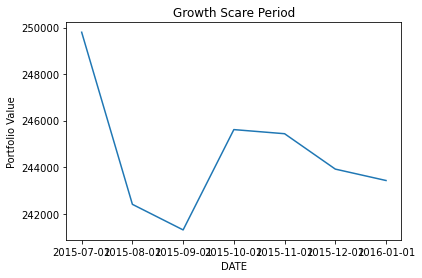

In [60]:
growth_scare["Portfolio"].plot()
plt.title('Growth Scare Period')
plt.xlabel('DATE')
plt.ylabel('Portfolio Value')

## 4.  Covid-19 Period: 2020-02 ~ 2021-06

In [61]:
open_day='2020-02-01'
close_day='2021-06-01'
con1=CAD_R['DATE']>=open_day
con2=CAD_R['DATE']<=close_day
covid_cad = CAD_R[con1&con2]
covid_cad

,DATE,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
166,2020-02-01,-0.080473,-0.061350,-0.071322,0.005312,0.007174,0.012002,-0.034979
167,2020-03-01,-0.136475,-0.150315,-0.141200,-0.033476,-0.005633,-0.076894,-0.272430
168,2020-04-01,0.124026,0.092978,0.055892,0.052750,0.032464,0.051803,0.061883
169,2020-05-01,0.048235,0.019052,0.052051,0.003723,0.001387,0.013002,-0.022028
170,2020-06-01,0.012030,0.033311,0.014675,0.017953,0.013425,0.016336,0.030267
171,2020-07-01,0.064593,0.041189,-0.010238,0.014390,0.011574,0.057263,0.012595
172,2020-08-01,0.065823,0.014682,0.037553,-0.014118,-0.015537,-0.008029,-0.018741
173,2020-09-01,-0.039588,-0.012715,-0.008133,0.003909,0.004744,0.001472,-0.008430
174,2020-10-01,-0.024732,-0.034865,-0.034850,-0.008661,-0.008086,-0.005143,-0.023549
175,2020-11-01,0.105663,0.097748,0.121070,0.011783,0.006898,0.017356,0.172612


In [62]:
covid_cad.to_csv('covid_cad.csv',encoding='utf-8',index=False)

In [63]:
covid_cad=pd.read_csv('covid_cad.csv',index_col=0)
covid_cad

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
DATE,,,,,,,
2020-02-01,-0.080473,-0.061350,-0.071322,0.005312,0.007174,0.012002,-0.034979
2020-03-01,-0.136475,-0.150315,-0.141200,-0.033476,-0.005633,-0.076894,-0.272430
2020-04-01,0.124026,0.092978,0.055892,0.052750,0.032464,0.051803,0.061883
2020-05-01,0.048235,0.019052,0.052051,0.003723,0.001387,0.013002,-0.022028
2020-06-01,0.012030,0.033311,0.014675,0.017953,0.013425,0.016336,0.030267
2020-07-01,0.064593,0.041189,-0.010238,0.014390,0.011574,0.057263,0.012595
2020-08-01,0.065823,0.014682,0.037553,-0.014118,-0.015537,-0.008029,-0.018741
2020-09-01,-0.039588,-0.012715,-0.008133,0.003909,0.004744,0.001472,-0.008430
2020-10-01,-0.024732,-0.034865,-0.034850,-0.008661,-0.008086,-0.005143,-0.023549


In [64]:
# Since we calculated the position of each cad asset at report date are 4281.155492, 5687.704412, 6989.969684, 16328.983559, 35942.422838, 33786.437108, 18735.155645
# Use each column multiply the corresponding asset position at the point of 2021-06-01

XSPTO_R=  4281.155492 * covid_cad["XSP.TO_R"]
XSPTO_R = XSPTO_R.to_frame(name='XSP.TO_R')

XIUTO_R=  5687.704412 * covid_cad["XIU.TO_R"]
XIUTO_R = XIUTO_R.to_frame(name='XIU.TO_R')

XINTO_R=  6989.969684 * covid_cad["XIN.TO_R"]
XINTO_R = XINTO_R.to_frame(name='XIN.TO_R')

XBBTO_R=  16328.983559 * covid_cad["XBB.TO_R"]
XBBTO_R = XBBTO_R.to_frame(name='XBB.TO_R')

XGBTO_R=  35942.422838 * covid_cad["XGB.TO_R"]
XGBTO_R = XGBTO_R.to_frame(name='XGB.TO_R')

XRBTO_R=  33786.437108 * covid_cad["XRB.TO_R"]
XRBTO_R = XRBTO_R.to_frame(name='XRB.TO_R')

XRETO_R=  18735.155645 * covid_cad["XRE.TO_R"]
XRETO_R = XRETO_R.to_frame(name='XRE.TO_R')

In [65]:
covid_cad = XSPTO_R.merge(XIUTO_R, on='DATE').merge(XINTO_R, on='DATE').merge(XBBTO_R, on='DATE').merge(XGBTO_R, on='DATE').merge(XRBTO_R, on='DATE').merge(XRETO_R, on='DATE')
covid_cad

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
DATE,,,,,,,
2020-02-01,-344.516381,-348.939255,-498.541057,86.732245,257.849144,405.490290,-655.342873
2020-03-01,-584.270721,-854.946828,-986.984083,-546.636271,-202.476248,-2597.961389,-5104.020607
2020-04-01,530.972463,528.831887,390.683770,861.349980,1166.820115,1750.228632,1159.395506
2020-05-01,206.500062,108.361240,363.835947,60.785588,49.860803,439.306662,-412.698964
2020-06-01,51.502228,189.462217,102.577910,293.157883,482.542015,551.935406,567.057293
2020-07-01,276.532514,234.271005,-71.566001,234.977290,416.011080,1934.698152,235.961342
2020-08-01,281.797599,83.506478,262.492465,-230.536297,-558.451333,-271.275020,-351.108957
2020-09-01,-169.483467,-72.320481,-56.852555,63.836855,170.523614,49.719546,-157.945718
2020-10-01,-105.881662,-198.299954,-243.602191,-141.422502,-290.639992,-173.773512,-441.200719


In [66]:
#Select the historical time range for US asset

open_day='2020-02-01'
close_day='2021-06-01'
con1=US_R['DATE']>=open_day
con2=US_R['DATE']<=close_day
covid_us = US_R[con1&con2]
covid_us

,DATE,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
166,2020-02-01,-0.079166,-0.060574,-0.035468,-0.070104,-0.077653,-0.079591,-0.085334,7.166530e-03,0.028236,0.008147,-0.075817
167,2020-03-01,-0.129987,-0.074830,-0.172014,-0.208046,-0.141067,-0.171992,-0.098142,1.257045e-02,0.037380,-0.016530,-0.204005
168,2020-04-01,0.133611,0.152188,0.080106,0.111213,0.058174,0.071486,0.110838,2.962356e-03,0.002761,0.028748,0.103691
169,2020-05-01,0.047645,0.066009,0.032900,0.035420,0.054269,0.058389,0.032251,-3.903250e-04,0.003409,0.005540,0.018015
170,2020-06-01,0.013275,0.061022,0.060225,0.029435,0.020624,0.032199,0.030658,2.527870e-04,0.000478,0.012339,0.017954
171,2020-07-01,0.063552,0.075332,0.090494,0.065964,0.033856,0.043715,0.055188,1.039414e-03,0.008640,0.023252,0.048155
172,2020-08-01,0.069797,0.109447,0.027435,0.051263,0.047220,0.043128,0.077607,-1.037980e-04,-0.009611,0.008899,0.002315
173,2020-09-01,-0.041281,-0.057786,-0.021498,-0.045280,-0.020468,-0.036567,-0.052667,-3.539950e-07,0.003368,-0.003780,-0.029301
174,2020-10-01,-0.021030,-0.030449,0.023060,-0.034294,-0.035507,-0.048868,-0.031083,-3.589510e-04,-0.013733,-0.010040,-0.023296
175,2020-11-01,0.108777,0.112258,0.085597,0.143937,0.142694,0.163944,0.110541,2.310640e-04,0.003399,0.012841,0.085795


In [67]:
covid_us.to_csv('covid_us.csv',encoding='utf-8',index=False)

In [68]:
covid_us=pd.read_csv('covid_us.csv',index_col=0)
covid_us

,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
DATE,,,,,,,,,,,
2020-02-01,-0.079166,-0.060574,-0.035468,-0.070104,-0.077653,-0.079591,-0.085334,7.166530e-03,0.028236,0.008147,-0.075817
2020-03-01,-0.129987,-0.074830,-0.172014,-0.208046,-0.141067,-0.171992,-0.098142,1.257045e-02,0.037380,-0.016530,-0.204005
2020-04-01,0.133611,0.152188,0.080106,0.111213,0.058174,0.071486,0.110838,2.962356e-03,0.002761,0.028748,0.103691
2020-05-01,0.047645,0.066009,0.032900,0.035420,0.054269,0.058389,0.032251,-3.903250e-04,0.003409,0.005540,0.018015
2020-06-01,0.013275,0.061022,0.060225,0.029435,0.020624,0.032199,0.030658,2.527870e-04,0.000478,0.012339,0.017954
2020-07-01,0.063552,0.075332,0.090494,0.065964,0.033856,0.043715,0.055188,1.039414e-03,0.008640,0.023252,0.048155
2020-08-01,0.069797,0.109447,0.027435,0.051263,0.047220,0.043128,0.077607,-1.037980e-04,-0.009611,0.008899,0.002315
2020-09-01,-0.041281,-0.057786,-0.021498,-0.045280,-0.020468,-0.036567,-0.052667,-3.539950e-07,0.003368,-0.003780,-0.029301
2020-10-01,-0.021030,-0.030449,0.023060,-0.034294,-0.035507,-0.048868,-0.031084,-3.589510e-04,-0.013733,-0.010040,-0.023296


In [69]:
# Since we calculated the position of each us asset at report date are 2683.842643，2518.447666，2941.990371，1090.113199，3252.875218，2244.345904，3328.173813，15231.961594，15436.154676，30907.651502，23657.994064

# Use each column multiply the corresponding asset position at the point of 2021-06-01

SPY_R=  2683.842643 * covid_us["SPY_R"] / 0.806699 # 0.806699 is the exchange rate of CADUSD
SPY_R = SPY_R.to_frame(name='SPY_R')

QQQ_R=  2518.447666 * covid_us["QQQ_R"] / 0.806699
QQQ_R = QQQ_R.to_frame(name='QQQ_R')

VWO_R=  2941.990371 * covid_us["VWO_R"] / 0.806699
VWO_R = VWO_R.to_frame(name='VWO_R')

EWC_R=  1090.113199 * covid_us["EWC_R"] / 0.806699
EWC_R = EWC_R.to_frame(name='EWC_R')

EFA_R=  3252.875218 * covid_us["EFA_R"] / 0.806699
EFA_R = EFA_R.to_frame(name='EFA_R')

VGK_R=  2244.345904 * covid_us["VGK_R"] / 0.806699
VGK_R = VGK_R.to_frame(name='VGK_R')

IOO_R=  3328.173813 * covid_us["IOO_R"] / 0.806699
IOO_R = IOO_R.to_frame(name='IOO_R')

SHY_R=  15231.961594 * covid_us["SHY_R"] / 0.806699
SHY_R = SHY_R.to_frame(name='SHY_R')

IEF_R=  15436.154676 * covid_us["IEF_R"] / 0.806699
IEF_R = IEF_R.to_frame(name='IEF_R')

TIP_R=  30907.651502 * covid_us["TIP_R"] / 0.806699
TIP_R = TIP_R.to_frame(name='TIP_R')

IYR_R=  23657.994064 * covid_us["IYR_R"] / 0.806699
IYR_R = IYR_R.to_frame(name='IYR_R')

In [70]:
covid_us = SPY_R.merge(QQQ_R, on='DATE').merge(VWO_R, on='DATE').merge(EWC_R, on='DATE').merge(EFA_R, on='DATE').merge(VGK_R, on='DATE').merge(IOO_R, on='DATE').merge(SHY_R, on='DATE').merge(IEF_R, on='DATE').merge(TIP_R, on='DATE').merge(IYR_R, on='DATE')
covid_us

,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
DATE,,,,,,,,,,,
2020-02-01,-263.380014,-189.107791,-129.348755,-94.733958,-313.121270,-221.433988,-352.061136,135.317274,540.285486,312.149238,-2223.473946
2020-03-01,-432.460644,-233.612928,-627.325961,-281.138397,-568.827781,-478.504196,-404.902547,237.353209,715.273125,-633.319905,-5982.825861
2020-04-01,444.515198,475.116939,292.140713,150.284582,234.578014,198.882423,457.278983,55.934733,52.835782,1101.450641,3040.939538
2020-05-01,158.513296,206.074323,119.985683,47.864126,218.830736,162.446845,133.058953,-7.370054,65.224025,212.267631,528.310174
2020-06-01,44.166031,190.504409,219.636928,39.776454,83.161509,89.580787,126.485342,4.773084,9.152922,472.752866,526.538828
2020-07-01,211.433755,235.180486,330.025347,89.139446,136.519399,121.620721,227.685612,19.626049,165.329573,890.873680,1412.241790
2020-08-01,232.209900,341.685012,100.055743,69.273432,190.406696,119.988439,320.178915,-1.959897,-183.904416,340.943542,67.901518
2020-09-01,-137.340586,-180.403342,-78.402011,-61.188515,-82.533224,-101.735572,-217.286580,-0.006684,64.451336,-144.830208,-859.307447
2020-10-01,-69.967009,-95.060004,84.099600,-46.342442,-143.174595,-135.957107,-128.240262,-6.777655,-262.786671,-384.653345,-683.185238


In [71]:
covid = covid_cad.merge(covid_us, on='DATE')
covid

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
DATE,,,,,,,,,,,,,,,,,,
2020-02-01,-344.516381,-348.939255,-498.541057,86.732245,257.849144,405.490290,-655.342873,-263.380014,-189.107791,-129.348755,-94.733958,-313.121270,-221.433988,-352.061136,135.317274,540.285486,312.149238,-2223.473946
2020-03-01,-584.270721,-854.946828,-986.984083,-546.636271,-202.476248,-2597.961389,-5104.020607,-432.460644,-233.612928,-627.325961,-281.138397,-568.827781,-478.504196,-404.902547,237.353209,715.273125,-633.319905,-5982.825861
2020-04-01,530.972463,528.831887,390.683770,861.349980,1166.820115,1750.228632,1159.395506,444.515198,475.116939,292.140713,150.284582,234.578014,198.882423,457.278983,55.934733,52.835782,1101.450641,3040.939538
2020-05-01,206.500062,108.361240,363.835947,60.785588,49.860803,439.306662,-412.698964,158.513296,206.074323,119.985683,47.864126,218.830736,162.446845,133.058953,-7.370054,65.224025,212.267631,528.310174
2020-06-01,51.502228,189.462217,102.577910,293.157883,482.542015,551.935406,567.057293,44.166031,190.504409,219.636928,39.776454,83.161509,89.580787,126.485342,4.773084,9.152922,472.752866,526.538828
2020-07-01,276.532514,234.271005,-71.566001,234.977290,416.011080,1934.698152,235.961342,211.433755,235.180486,330.025347,89.139446,136.519399,121.620721,227.685612,19.626049,165.329573,890.873680,1412.241790
2020-08-01,281.797599,83.506478,262.492465,-230.536297,-558.451333,-271.275020,-351.108957,232.209900,341.685012,100.055743,69.273432,190.406696,119.988439,320.178915,-1.959897,-183.904416,340.943542,67.901518
2020-09-01,-169.483467,-72.320481,-56.852555,63.836855,170.523614,49.719546,-157.945718,-137.340586,-180.403342,-78.402011,-61.188515,-82.533224,-101.735572,-217.286580,-0.006684,64.451336,-144.830208,-859.307447
2020-10-01,-105.881662,-198.299954,-243.602191,-141.422502,-290.639992,-173.773512,-441.200719,-69.967009,-95.060004,84.099600,-46.342442,-143.174595,-135.957107,-128.240262,-6.777655,-262.786671,-384.653345,-683.185238


In [72]:
covid["Portfolio"] = covid.sum(axis=1)
covid

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R,Portfolio
DATE,,,,,,,,,,,,,,,,,,,
2020-02-01,-344.516381,-348.939255,-498.541057,86.732245,257.849144,405.490290,-655.342873,-263.380014,-189.107791,-129.348755,-94.733958,-313.121270,-221.433988,-352.061136,135.317274,540.285486,312.149238,-2223.473946,-3896.176747
2020-03-01,-584.270721,-854.946828,-986.984083,-546.636271,-202.476248,-2597.961389,-5104.020607,-432.460644,-233.612928,-627.325961,-281.138397,-568.827781,-478.504196,-404.902547,237.353209,715.273125,-633.319905,-5982.825861,-19567.588032
2020-04-01,530.972463,528.831887,390.683770,861.349980,1166.820115,1750.228632,1159.395506,444.515198,475.116939,292.140713,150.284582,234.578014,198.882423,457.278983,55.934733,52.835782,1101.450641,3040.939538,12892.239899
2020-05-01,206.500062,108.361240,363.835947,60.785588,49.860803,439.306662,-412.698964,158.513296,206.074323,119.985683,47.864126,218.830736,162.446845,133.058953,-7.370054,65.224025,212.267631,528.310174,2661.157075
2020-06-01,51.502228,189.462217,102.577910,293.157883,482.542015,551.935406,567.057293,44.166031,190.504409,219.636928,39.776454,83.161509,89.580787,126.485342,4.773084,9.152922,472.752866,526.538828,4044.764112
2020-07-01,276.532514,234.271005,-71.566001,234.977290,416.011080,1934.698152,235.961342,211.433755,235.180486,330.025347,89.139446,136.519399,121.620721,227.685612,19.626049,165.329573,890.873680,1412.241790,7100.561242
2020-08-01,281.797599,83.506478,262.492465,-230.536297,-558.451333,-271.275020,-351.108957,232.209900,341.685012,100.055743,69.273432,190.406696,119.988439,320.178915,-1.959897,-183.904416,340.943542,67.901518,813.203821
2020-09-01,-169.483467,-72.320481,-56.852555,63.836855,170.523614,49.719546,-157.945718,-137.340586,-180.403342,-78.402011,-61.188515,-82.533224,-101.735572,-217.286580,-0.006684,64.451336,-144.830208,-859.307447,-1971.105040
2020-10-01,-105.881662,-198.299954,-243.602191,-141.422502,-290.639992,-173.773512,-441.200719,-69.967009,-95.060004,84.099600,-46.342442,-143.174595,-135.957107,-128.240262,-6.777655,-262.786671,-384.653345,-683.185238,-3466.865260


In [73]:
covid.iloc[0,18] = 249796.55254369302

In [74]:
covid

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R,Portfolio
DATE,,,,,,,,,,,,,,,,,,,
2020-02-01,-344.516381,-348.939255,-498.541057,86.732245,257.849144,405.490290,-655.342873,-263.380014,-189.107791,-129.348755,-94.733958,-313.121270,-221.433988,-352.061136,135.317274,540.285486,312.149238,-2223.473946,249796.552544
2020-03-01,-584.270721,-854.946828,-986.984083,-546.636271,-202.476248,-2597.961389,-5104.020607,-432.460644,-233.612928,-627.325961,-281.138397,-568.827781,-478.504196,-404.902547,237.353209,715.273125,-633.319905,-5982.825861,-19567.588032
2020-04-01,530.972463,528.831887,390.683770,861.349980,1166.820115,1750.228632,1159.395506,444.515198,475.116939,292.140713,150.284582,234.578014,198.882423,457.278983,55.934733,52.835782,1101.450641,3040.939538,12892.239899
2020-05-01,206.500062,108.361240,363.835947,60.785588,49.860803,439.306662,-412.698964,158.513296,206.074323,119.985683,47.864126,218.830736,162.446845,133.058953,-7.370054,65.224025,212.267631,528.310174,2661.157075
2020-06-01,51.502228,189.462217,102.577910,293.157883,482.542015,551.935406,567.057293,44.166031,190.504409,219.636928,39.776454,83.161509,89.580787,126.485342,4.773084,9.152922,472.752866,526.538828,4044.764112
2020-07-01,276.532514,234.271005,-71.566001,234.977290,416.011080,1934.698152,235.961342,211.433755,235.180486,330.025347,89.139446,136.519399,121.620721,227.685612,19.626049,165.329573,890.873680,1412.241790,7100.561242
2020-08-01,281.797599,83.506478,262.492465,-230.536297,-558.451333,-271.275020,-351.108957,232.209900,341.685012,100.055743,69.273432,190.406696,119.988439,320.178915,-1.959897,-183.904416,340.943542,67.901518,813.203821
2020-09-01,-169.483467,-72.320481,-56.852555,63.836855,170.523614,49.719546,-157.945718,-137.340586,-180.403342,-78.402011,-61.188515,-82.533224,-101.735572,-217.286580,-0.006684,64.451336,-144.830208,-859.307447,-1971.105040
2020-10-01,-105.881662,-198.299954,-243.602191,-141.422502,-290.639992,-173.773512,-441.200719,-69.967009,-95.060004,84.099600,-46.342442,-143.174595,-135.957107,-128.240262,-6.777655,-262.786671,-384.653345,-683.185238,-3466.865260


In [75]:
# Cumulative Portfolio Value
covid['Portfolio'] = np.cumsum(covid['Portfolio'])
covid

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R,Portfolio
DATE,,,,,,,,,,,,,,,,,,,
2020-02-01,-344.516381,-348.939255,-498.541057,86.732245,257.849144,405.490290,-655.342873,-263.380014,-189.107791,-129.348755,-94.733958,-313.121270,-221.433988,-352.061136,135.317274,540.285486,312.149238,-2223.473946,249796.552544
2020-03-01,-584.270721,-854.946828,-986.984083,-546.636271,-202.476248,-2597.961389,-5104.020607,-432.460644,-233.612928,-627.325961,-281.138397,-568.827781,-478.504196,-404.902547,237.353209,715.273125,-633.319905,-5982.825861,230228.964512
2020-04-01,530.972463,528.831887,390.683770,861.349980,1166.820115,1750.228632,1159.395506,444.515198,475.116939,292.140713,150.284582,234.578014,198.882423,457.278983,55.934733,52.835782,1101.450641,3040.939538,243121.204411
2020-05-01,206.500062,108.361240,363.835947,60.785588,49.860803,439.306662,-412.698964,158.513296,206.074323,119.985683,47.864126,218.830736,162.446845,133.058953,-7.370054,65.224025,212.267631,528.310174,245782.361486
2020-06-01,51.502228,189.462217,102.577910,293.157883,482.542015,551.935406,567.057293,44.166031,190.504409,219.636928,39.776454,83.161509,89.580787,126.485342,4.773084,9.152922,472.752866,526.538828,249827.125597
2020-07-01,276.532514,234.271005,-71.566001,234.977290,416.011080,1934.698152,235.961342,211.433755,235.180486,330.025347,89.139446,136.519399,121.620721,227.685612,19.626049,165.329573,890.873680,1412.241790,256927.686839
2020-08-01,281.797599,83.506478,262.492465,-230.536297,-558.451333,-271.275020,-351.108957,232.209900,341.685012,100.055743,69.273432,190.406696,119.988439,320.178915,-1.959897,-183.904416,340.943542,67.901518,257740.890660
2020-09-01,-169.483467,-72.320481,-56.852555,63.836855,170.523614,49.719546,-157.945718,-137.340586,-180.403342,-78.402011,-61.188515,-82.533224,-101.735572,-217.286580,-0.006684,64.451336,-144.830208,-859.307447,255769.785620
2020-10-01,-105.881662,-198.299954,-243.602191,-141.422502,-290.639992,-173.773512,-441.200719,-69.967009,-95.060004,84.099600,-46.342442,-143.174595,-135.957107,-128.240262,-6.777655,-262.786671,-384.653345,-683.185238,252302.920360


Text(0, 0.5, 'Portfolio Value')

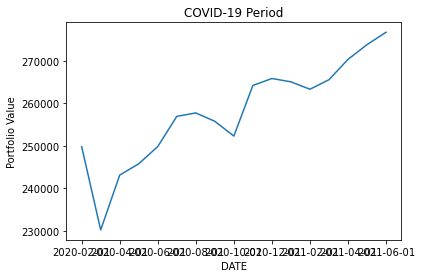

In [76]:
covid["Portfolio"].plot()
plt.title('COVID-19 Period')
plt.xlabel('DATE')
plt.ylabel('Portfolio Value')

# Hypothetical Scenario

#####  First, use VAR model to predict the next 4 quarters for Macro data, then run OLS regression between Macro and Factor data, so we will get the Factor data in next 4 quarter. Then, run OLS between Fatcor and Asset therefore we will get the predicted returns of asset.

In [77]:
ecodata = pd.read_csv('ecodata.csv',index_col=0) 

In [78]:
ecodata = ecodata.dropna()
ecodata

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
DATE,,,,,,,,
1990-04-01,0.009190,-0.011242,12.634211,8.243333,5.333333,0.003627,0.009071,1.182573
1990-07-01,0.006938,0.006737,13.530000,8.160000,5.700000,0.000664,0.012711,1.170626
1990-10-01,0.008613,0.000970,12.936500,7.743333,6.133333,-0.009096,0.013227,1.153360
1991-01-01,0.009394,-0.015602,12.081951,6.426667,6.600000,-0.004686,0.005259,1.161153
1991-04-01,0.030034,0.017401,10.262750,5.863333,6.833333,0.007793,0.005457,1.155889
...,...,...,...,...,...,...,...,...
2020-01-01,0.000249,-0.015392,1.657903,1.260000,3.800000,-0.012629,0.003197,1.320194
2020-04-01,0.005729,-0.112720,1.270317,0.060000,13.066667,-0.089863,-0.004040,1.343582
2020-07-01,0.000248,0.106392,0.218730,0.093333,8.800000,0.074789,0.009019,1.386302


###  VAR Model fitting

In [79]:
from statsmodels.tsa.api import VAR

In [80]:
model = VAR(ecodata)
model_fitted = model.fit(1)

/Users/Grace/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


In [81]:
# Get the lag order
lag_order = 1

# Input data for forecasting
forecast_input = ecodata.values[-lag_order:]
forecast_input

array([[5.188000e-03, 8.449000e-03, 1.043550e-01, 8.000000e-02,
        6.166667e+00, 1.553500e-02, 9.171000e-03, 1.303295e+00]])

In [82]:
# Forecast (next 5 quarter)
num_q = 5
fc = model_fitted.forecast(y=forecast_input, steps=num_q)
eco_forecast=pd.DataFrame(fc,index=pd.date_range(start=ecodata.index[-1], periods=num_q+1,freq='QS-OCT')[1:],columns=ecodata.columns)
eco_forecast

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
2021-04-01,0.004618,0.005960,0.445443,0.352996,5.815062,0.007840,0.005197,1.264043
2021-07-01,0.004098,0.004136,0.536391,0.443854,5.806782,0.004756,0.003956,1.254990
2021-10-01,0.003938,0.004352,0.549658,0.484027,5.879046,0.004384,0.003665,1.255162
2022-01-01,0.003863,0.004657,0.547055,0.516060,5.944739,0.004589,0.003623,1.256722
2022-04-01,0.003833,0.004980,0.548580,0.553167,5.986787,0.004912,0.003650,1.258009


###  Forecasted Macro Data

In [83]:
eco_forecast = eco_forecast.iloc[-4:]
eco_forecast = eco_forecast.set_axis(['Q1', 'Q2', 'Q3','Q4'], axis='index')
eco_forecast

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
Q1,0.004098,0.004136,0.536391,0.443854,5.806782,0.004756,0.003956,1.254990
Q2,0.003938,0.004352,0.549658,0.484027,5.879046,0.004384,0.003665,1.255162
Q3,0.003863,0.004657,0.547055,0.516060,5.944739,0.004589,0.003623,1.256722
Q4,0.003833,0.004980,0.548580,0.553167,5.986787,0.004912,0.003650,1.258009


In [84]:
eco_forecast.to_csv('eco_forecast.csv')

## OLS between Ecodata and Factors then we will get the forecasted Factor data

In [85]:
# Ecodata_new is the dataset which including the predicted data on 2021-04-01
ecodata_new = pd.read_csv('ecodata_new.csv',index_col=0) 
ecodata_new

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
DATE,,,,,,,,
1990-04-01,0.009190,-0.011242,12.634211,8.243333,5.333333,0.003627,0.009071,1.182573
1990-07-01,0.006938,0.006737,13.530000,8.160000,5.700000,0.000664,0.012711,1.170626
1990-10-01,0.008613,0.000970,12.936500,7.743333,6.133333,-0.009096,0.013227,1.153360
1991-01-01,0.009394,-0.015602,12.081951,6.426667,6.600000,-0.004686,0.005259,1.161153
1991-04-01,0.030034,0.017401,10.262750,5.863333,6.833333,0.007793,0.005457,1.155889
...,...,...,...,...,...,...,...,...
2020-04-01,0.005729,-0.112720,1.270317,0.060000,13.066667,-0.089863,-0.004040,1.343582
2020-07-01,0.000248,0.106392,0.218730,0.093333,8.800000,0.074789,0.009019,1.386302
2020-10-01,0.002228,0.006253,0.161111,0.090000,6.766667,0.010640,0.003632,1.331933


In [86]:
factors = pd.read_csv('3factors.csv',index_col=0) 

In [87]:
factors = factors.dropna()
factors

,Mkt-RF,SMB,HML
DATE,,,
1990-04-01,0.948779,1.015119,0.983616
1990-07-01,1.036350,0.985614,0.918707
1990-10-01,0.827485,0.894995,1.022390
1991-01-01,1.068741,0.954217,0.953059
1991-04-01,1.151910,1.121406,0.964297
...,...,...,...
2020-04-01,0.794903,0.875624,0.774840
2020-07-01,1.229435,1.068065,0.914299
2020-10-01,1.097078,0.961257,0.933085


In [88]:
lin_reg = LinearRegression()
lin_reg.fit(ecodata_new,factors)

LinearRegression()

In [89]:
y_pred = lin_reg.predict(eco_forecast)
y_pred

array([[1.02601639, 1.01245377, 1.00277055],
       [1.02398168, 1.01086353, 1.00218846],
       [1.0244821 , 1.01066267, 1.00197241],
       [1.02552963, 1.01080222, 1.00193438]])

###  Forecasted Factor Data

In [90]:
factor_forecast = pd.DataFrame(y_pred)
factor_forecast = factor_forecast.set_axis(['Q1', 'Q2', 'Q3','Q4'], axis='index')
factor_forecast = factor_forecast.set_axis(['Mkt-RF', 'SMB', 'HML'], axis=1)
factor_forecast

,Mkt-RF,SMB,HML
Q1,1.026016,1.012454,1.002771
Q2,1.023982,1.010864,1.002188
Q3,1.024482,1.010663,1.001972
Q4,1.025530,1.010802,1.001934


##  OLS between Assets and Factors then we will get the forecasting Asset data

In [91]:
# CAD Asset Returns
cad_r = pd.read_csv('df_cad_asset_r.csv', index_col=0) 

In [92]:
cad_r

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
DATE,,,,,,,
2006-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-05-01,-0.033333,-0.032005,-0.055877,0.003859,NaN,-0.009774,0.001456
2006-06-01,0.006896,-0.010370,0.011837,-0.016778,NaN,-0.017143,-0.005087
2006-07-01,0.001246,0.023036,0.002420,0.033027,NaN,0.044349,0.059085
2006-08-01,0.021144,0.022209,0.028169,0.018100,NaN,0.019467,0.029412
...,...,...,...,...,...,...,...
2021-02-01,0.027277,0.036510,0.027902,-0.027332,-0.031403,-0.042799,0.038749
2021-03-01,0.044093,0.052981,0.050670,-0.012858,-0.014470,-0.008554,0.047735
2021-04-01,0.050630,0.023050,0.011023,0.000277,0.001321,-0.020000,0.046759


In [93]:
us_r = pd.read_csv('df_usd_asset_r.csv', index_col=0) 
us_r

,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
DATE,,,,,,,,,,,
2006-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-05-01,-0.030121,-0.072401,-0.112919,-0.022526,-0.038218,-0.029335,-0.029170,0.001704,-0.001521,0.003131,-0.033052
2006-06-01,-0.001804,-0.001288,-0.000933,-0.022634,-0.000611,0.010130,-0.000604,0.002296,0.002279,0.003670,0.036364
2006-07-01,0.008918,-0.042431,0.018513,0.001263,0.008105,0.010363,0.020698,0.006519,0.016540,0.015081,0.046102
2006-08-01,0.021823,0.047710,0.014816,0.040791,0.025485,0.032424,0.029455,0.007392,0.017597,0.016621,0.029791
...,...,...,...,...,...,...,...,...,...,...,...
2021-02-01,0.027805,-0.001335,0.015673,0.051307,0.022379,0.025796,0.017165,-0.000926,-0.024275,-0.016876,0.024273
2021-03-01,0.041987,0.015885,-0.008383,0.058439,0.025132,0.028739,0.031406,-0.000464,-0.023805,-0.002623,0.052547
2021-04-01,0.056359,0.060436,0.019180,0.045815,0.029524,0.052289,0.048780,0.000603,0.009997,0.011872,0.084179


In [94]:
Asset_factor_merge = factors.merge(cad_r, on='DATE').merge(us_r, on='DATE').dropna()
Asset_factor_merge

,Mkt-RF,SMB,HML,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,...,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
DATE,,,,,,,,,,,,,,,,,,,,,
2007-01-01,1.059087,1.019335,1.024835,0.012958,0.012409,0.041719,0.008516,0.001713,0.008403,0.064424,...,0.022328,0.018463,0.012084,0.035344,0.042899,0.027932,0.008302,0.002495,0.002328,0.111013
2007-04-01,1.000886,1.016639,0.983183,0.043065,0.021492,0.024225,0.010381,0.007456,0.009840,0.034727,...,0.056489,0.038037,0.061186,0.037483,0.057530,0.054970,0.002759,0.005479,0.005738,0.010731
2007-07-01,1.047490,0.990791,0.969207,-0.029178,0.007546,-0.038449,0.014820,0.012548,0.018526,-0.034879,...,-0.000690,0.035163,0.000000,-0.022905,-0.028429,-0.022421,0.008882,0.022734,0.023081,-0.081957
2007-10-01,1.002841,0.944002,0.925170,0.014644,0.045350,0.029076,0.017006,0.016859,0.003752,-0.033252,...,0.070971,0.130083,0.102352,0.042499,0.047443,0.029960,0.004898,0.011047,0.011947,0.016606
2008-01-01,0.960402,0.972059,0.955520,-0.050061,-0.040450,-0.085962,0.016032,0.015824,0.002308,-0.037990,...,-0.117980,-0.073075,-0.045670,-0.054921,-0.060909,-0.071255,0.023439,0.040856,0.045190,0.012597
2008-04-01,0.899026,0.996659,1.029016,0.050487,0.064680,0.062150,0.005007,-0.000715,-0.018482,0.036814,...,0.080670,0.084335,0.070934,0.054381,0.040994,0.052263,-0.008526,-0.024474,-0.020817,0.069870
2008-07-01,0.975531,1.032506,0.949003,0.000103,-0.045418,-0.009269,0.019110,0.017818,0.011825,0.001648,...,0.007122,-0.047222,-0.051280,-0.014905,-0.028807,0.008776,0.004391,0.007406,-0.005099,0.035072
2008-10-01,0.914391,1.074534,1.132790,-0.208761,-0.164559,-0.185520,0.001108,0.001842,-0.044920,-0.211617,...,-0.154147,-0.272649,-0.271830,-0.208348,-0.218287,-0.152447,0.010515,-0.008755,-0.081113,-0.304357
2009-01-01,0.775913,0.960612,0.915976,-0.082629,-0.025327,-0.096240,-0.001990,-0.006149,-0.006211,0.034566,...,-0.021446,-0.041850,-0.022316,-0.126339,-0.069777,-0.114835,0.002891,-0.032088,-0.000403,-0.136664


In [95]:
Asset_factor_merge.to_csv('Asset_factor_merge_new.csv')

In [96]:
Asset_Quarter = pd.read_csv('Asset_Quarter.csv',index_col=0) 
Asset_Quarter

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
DATE,,,,,,,,,,,,,,,,,,
2007-01-01,0.012958,0.012409,0.041719,0.008516,0.001713,0.008403,0.064424,0.020696,0.022328,0.018463,0.012084,0.035344,0.042899,0.027932,0.008302,0.002495,0.002328,0.111013
2007-04-01,0.043065,0.021492,0.024225,0.010381,0.007456,0.009840,0.034727,0.048438,0.056489,0.038037,0.061186,0.037483,0.057530,0.054970,0.002759,0.005479,0.005738,0.010731
2007-07-01,-0.029178,0.007546,-0.038449,0.014820,0.012548,0.018526,-0.034879,-0.027135,-0.000690,0.035163,0.000000,-0.022905,-0.028429,-0.022421,0.008882,0.022734,0.023081,-0.081957
2007-10-01,0.014644,0.045350,0.029076,0.017006,0.016859,0.003752,-0.033252,0.018375,0.070971,0.130083,0.102352,0.042499,0.047443,0.029960,0.004898,0.011047,0.011947,0.016606
2008-01-01,-0.050061,-0.040450,-0.085962,0.016032,0.015824,0.002308,-0.037990,-0.055475,-0.117980,-0.073075,-0.045670,-0.054921,-0.060909,-0.071255,0.023439,0.040856,0.045190,0.012597
2008-04-01,0.050487,0.064680,0.062150,0.005007,-0.000715,-0.018482,0.036814,0.052849,0.080670,0.084335,0.070934,0.054381,0.040994,0.052263,-0.008526,-0.024474,-0.020817,0.069870
2008-07-01,0.000103,-0.045418,-0.009269,0.019110,0.017818,0.011825,0.001648,-0.004029,0.007122,-0.047222,-0.051280,-0.014905,-0.028807,0.008776,0.004391,0.007406,-0.005099,0.035072
2008-10-01,-0.208761,-0.164559,-0.185520,0.001108,0.001842,-0.044920,-0.211617,-0.160354,-0.154147,-0.272649,-0.271830,-0.208348,-0.218287,-0.152447,0.010515,-0.008755,-0.081113,-0.304357
2009-01-01,-0.082629,-0.025327,-0.096240,-0.001990,-0.006149,-0.006211,0.034566,-0.074663,-0.021446,-0.041850,-0.022316,-0.126339,-0.069777,-0.114835,0.002891,-0.032088,-0.000403,-0.136664


In [97]:
Factors_Quarter = pd.read_csv('Factor_Quarter.csv',index_col=0) 
Factors_Quarter

,Mkt-RF,SMB,HML
DATE,,,
2007-01-01,1.059087,1.019335,1.024835
2007-04-01,1.000886,1.016639,0.983183
2007-07-01,1.047490,0.990791,0.969207
2007-10-01,1.002841,0.944002,0.925170
2008-01-01,0.960402,0.972059,0.955520
2008-04-01,0.899026,0.996659,1.029016
2008-07-01,0.975531,1.032506,0.949003
2008-10-01,0.914391,1.074534,1.132790
2009-01-01,0.775913,0.960612,0.915976


In [98]:
lin_reg = LinearRegression()
lin_reg.fit(Factors_Quarter,Asset_Quarter)

LinearRegression()

In [99]:
y_pred = lin_reg.predict(factor_forecast)
y_pred

array([[0.01487015, 0.01055433, 0.01183591, 0.00582909, 0.00421879,
        0.00788971, 0.01189575, 0.01771314, 0.02409512, 0.01838104,
        0.01352813, 0.0163286 , 0.02107358, 0.02018186, 0.00249353,
        0.00458961, 0.00591844, 0.02486284],
       [0.01510333, 0.01071979, 0.0119431 , 0.00589367, 0.00425945,
        0.00787669, 0.0119669 , 0.01796785, 0.02438295, 0.01867805,
        0.01385222, 0.01639747, 0.02112534, 0.02025026, 0.0025001 ,
        0.00454722, 0.00596262, 0.02516818],
       [0.01516479, 0.01075161, 0.01196576, 0.00590699, 0.00427631,
        0.00796476, 0.01199586, 0.01800328, 0.02440153, 0.01877931,
        0.01389628, 0.01644012, 0.02115652, 0.02026671, 0.00250133,
        0.00459768, 0.00603432, 0.02527236],
       [0.01517026, 0.01073799, 0.01195826, 0.00590328, 0.00428311,
        0.00806186, 0.01199871, 0.01797464, 0.02434239, 0.01880669,
        0.01385521, 0.01646331, 0.02116715, 0.02025933, 0.00250108,
        0.00466556, 0.00610336, 0.02530187]])

In [100]:
asset_forecast = pd.DataFrame(y_pred)
asset_forecast

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.014870,0.010554,0.011836,0.005829,0.004219,0.007890,0.011896,0.017713,0.024095,0.018381,0.013528,0.016329,0.021074,0.020182,0.002494,0.004590,0.005918,0.024863
1,0.015103,0.010720,0.011943,0.005894,0.004259,0.007877,0.011967,0.017968,0.024383,0.018678,0.013852,0.016397,0.021125,0.020250,0.002500,0.004547,0.005963,0.025168
2,0.015165,0.010752,0.011966,0.005907,0.004276,0.007965,0.011996,0.018003,0.024402,0.018779,0.013896,0.016440,0.021157,0.020267,0.002501,0.004598,0.006034,0.025272
3,0.015170,0.010738,0.011958,0.005903,0.004283,0.008062,0.011999,0.017975,0.024342,0.018807,0.013855,0.016463,0.021167,0.020259,0.002501,0.004666,0.006103,0.025302


In [101]:
asset_forecast = asset_forecast.set_axis(['Q1', 'Q2', 'Q3','Q4'], axis='index')
asset_forecast = asset_forecast.set_axis(['XSP.TO_R','XIU.TO_R','XIN.TO_R','XBB.TO_R','XGB.TO_R','XRB.TO_R','XRE.TO_R','SPY_R','QQQ_R','VWO_R','EWC_R','EFA_R','VGK_R','IOO_R','SHY_R','IEF_R','TIP_R','IYR_R'], axis=1)
asset_forecast

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
Q1,0.014870,0.010554,0.011836,0.005829,0.004219,0.007890,0.011896,0.017713,0.024095,0.018381,0.013528,0.016329,0.021074,0.020182,0.002494,0.004590,0.005918,0.024863
Q2,0.015103,0.010720,0.011943,0.005894,0.004259,0.007877,0.011967,0.017968,0.024383,0.018678,0.013852,0.016397,0.021125,0.020250,0.002500,0.004547,0.005963,0.025168
Q3,0.015165,0.010752,0.011966,0.005907,0.004276,0.007965,0.011996,0.018003,0.024402,0.018779,0.013896,0.016440,0.021157,0.020267,0.002501,0.004598,0.006034,0.025272
Q4,0.015170,0.010738,0.011958,0.005903,0.004283,0.008062,0.011999,0.017975,0.024342,0.018807,0.013855,0.016463,0.021167,0.020259,0.002501,0.004666,0.006103,0.025302


In [102]:
# Since we calculated the position of each cad asset at report date are 4281.155492, 5687.704412, 6989.969684, 16328.983559, 35942.422838, 33786.437108, 18735.155645
# Use each column multiply the corresponding asset position at the point of 2021-06-01

XSPTO_R=  4281.155492 * asset_forecast["XSP.TO_R"]
XSPTO_R = XSPTO_R.to_frame(name='XSP.TO_R')

XIUTO_R=  5687.704412 * asset_forecast["XIU.TO_R"]
XIUTO_R = XIUTO_R.to_frame(name='XIU.TO_R')

XINTO_R=  6989.969684 * asset_forecast["XIN.TO_R"]
XINTO_R = XINTO_R.to_frame(name='XIN.TO_R')

XBBTO_R=  16328.983559 * asset_forecast["XBB.TO_R"]
XBBTO_R = XBBTO_R.to_frame(name='XBB.TO_R')

XGBTO_R=  35942.422838 * asset_forecast["XGB.TO_R"]
XGBTO_R = XGBTO_R.to_frame(name='XGB.TO_R')

XRBTO_R=  33786.437108 * asset_forecast["XRB.TO_R"]
XRBTO_R = XRBTO_R.to_frame(name='XRB.TO_R')

XRETO_R=  18735.155645 * asset_forecast["XRE.TO_R"]
XRETO_R = XRETO_R.to_frame(name='XRE.TO_R')

In [103]:
asset_ca_forecast = XSPTO_R.merge(XIUTO_R, left_index=True, right_index=True).merge(XINTO_R, left_index=True, right_index=True).merge(XBBTO_R, left_index=True, right_index=True).merge(XGBTO_R, left_index=True, right_index=True).merge(XRBTO_R, left_index=True, right_index=True).merge(XRETO_R, left_index=True, right_index=True)
asset_ca_forecast

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
Q1,63.661422,60.029930,82.732618,95.183106,151.633517,266.565112,222.868776
Q2,64.659685,60.970995,83.481939,96.237691,153.094970,266.125168,224.201779
Q3,64.922837,61.151985,83.640309,96.455102,153.701098,269.100971,224.744346
Q4,64.946253,61.074487,83.587859,96.394480,153.945331,272.381532,224.797690


In [104]:
# Since we calculated the position of each us asset at report date are 2683.842643，2518.447666，2941.990371，1090.113199，3252.875218，2244.345904，3328.173813，15231.961594，15436.154676，30907.651502，23657.994064

# Use each column multiply the corresponding asset position at the point of 2021-06-01

SPY_R=  2683.842643 * asset_forecast["SPY_R"] / 0.806699 # 0.806699 is the exchange rate of CADUSD
SPY_R = SPY_R.to_frame(name='SPY_R')

QQQ_R=  2518.447666 * asset_forecast["QQQ_R"] / 0.806699
QQQ_R = QQQ_R.to_frame(name='QQQ_R')

VWO_R=  2941.990371 * asset_forecast["VWO_R"] / 0.806699
VWO_R = VWO_R.to_frame(name='VWO_R')

EWC_R=  1090.113199 * asset_forecast["EWC_R"] / 0.806699
EWC_R = EWC_R.to_frame(name='EWC_R')

EFA_R=  3252.875218 * asset_forecast["EFA_R"] / 0.806699
EFA_R = EFA_R.to_frame(name='EFA_R')

VGK_R=  2244.345904 * asset_forecast["VGK_R"] / 0.806699
VGK_R = VGK_R.to_frame(name='VGK_R')

IOO_R=  3328.173813 * asset_forecast["IOO_R"] / 0.806699
IOO_R = IOO_R.to_frame(name='IOO_R')

SHY_R=  15231.961594 * asset_forecast["SHY_R"] / 0.806699
SHY_R = SHY_R.to_frame(name='SHY_R')

IEF_R=  15436.154676 * asset_forecast["IEF_R"] / 0.806699
IEF_R = IEF_R.to_frame(name='IEF_R')

TIP_R=  30907.651502 * asset_forecast["TIP_R"] / 0.806699
TIP_R = TIP_R.to_frame(name='TIP_R')

IYR_R=  23657.994064 * asset_forecast["IYR_R"] / 0.806699
IYR_R = IYR_R.to_frame(name='IYR_R')

In [105]:
asset_us_forecast = SPY_R.merge(QQQ_R, left_index=True, right_index=True).merge(VWO_R, left_index=True, right_index=True).merge(EWC_R, left_index=True, right_index=True).merge(EFA_R, left_index=True, right_index=True).merge(VGK_R, left_index=True, right_index=True).merge(IOO_R, left_index=True, right_index=True).merge(SHY_R, left_index=True, right_index=True).merge(IEF_R, left_index=True, right_index=True).merge(TIP_R, left_index=True, right_index=True).merge(IYR_R, left_index=True, right_index=True)
asset_us_forecast

,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
Q1,58.930637,75.222980,67.034734,18.280913,65.842257,58.629565,83.263705,47.082526,87.822001,226.757537,729.150413
Q2,59.778049,76.121542,68.117899,18.718865,66.119992,58.773563,83.545883,47.206533,87.010843,228.450275,738.105102
Q3,59.895923,76.179570,68.487190,18.778400,66.291960,58.860313,83.613762,47.229773,87.976402,231.197260,741.160529
Q4,59.800628,75.994938,68.587057,18.722904,66.385463,58.889872,83.583309,47.225053,89.275387,233.842384,742.025922


In [106]:
ASSET_FORECAST = asset_ca_forecast.merge(asset_us_forecast, left_index=True, right_index=True)
ASSET_FORECAST

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
Q1,63.661422,60.029930,82.732618,95.183106,151.633517,266.565112,222.868776,58.930637,75.222980,67.034734,18.280913,65.842257,58.629565,83.263705,47.082526,87.822001,226.757537,729.150413
Q2,64.659685,60.970995,83.481939,96.237691,153.094970,266.125168,224.201779,59.778049,76.121542,68.117899,18.718865,66.119992,58.773563,83.545883,47.206533,87.010843,228.450275,738.105102
Q3,64.922837,61.151985,83.640309,96.455102,153.701098,269.100971,224.744346,59.895923,76.179570,68.487190,18.778400,66.291960,58.860313,83.613762,47.229773,87.976402,231.197260,741.160529
Q4,64.946253,61.074487,83.587859,96.394480,153.945331,272.381532,224.797690,59.800628,75.994938,68.587057,18.722904,66.385463,58.889872,83.583309,47.225053,89.275387,233.842384,742.025922


In [107]:
ASSET_FORECAST["Portfolio"] = ASSET_FORECAST.sum(axis=1)
ASSET_FORECAST

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R,Portfolio
Q1,63.661422,60.029930,82.732618,95.183106,151.633517,266.565112,222.868776,58.930637,75.222980,67.034734,18.280913,65.842257,58.629565,83.263705,47.082526,87.822001,226.757537,729.150413,2460.691750
Q2,64.659685,60.970995,83.481939,96.237691,153.094970,266.125168,224.201779,59.778049,76.121542,68.117899,18.718865,66.119992,58.773563,83.545883,47.206533,87.010843,228.450275,738.105102,2480.720774
Q3,64.922837,61.151985,83.640309,96.455102,153.701098,269.100971,224.744346,59.895923,76.179570,68.487190,18.778400,66.291960,58.860313,83.613762,47.229773,87.976402,231.197260,741.160529,2493.387730
Q4,64.946253,61.074487,83.587859,96.394480,153.945331,272.381532,224.797690,59.800628,75.994938,68.587057,18.722904,66.385463,58.889872,83.583309,47.225053,89.275387,233.842384,742.025922,2501.460549


In [108]:
ASSET_FORECAST.iloc[0,18] = 249796.55254369302

In [109]:
ASSET_FORECAST

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R,Portfolio
Q1,63.661422,60.029930,82.732618,95.183106,151.633517,266.565112,222.868776,58.930637,75.222980,67.034734,18.280913,65.842257,58.629565,83.263705,47.082526,87.822001,226.757537,729.150413,249796.552544
Q2,64.659685,60.970995,83.481939,96.237691,153.094970,266.125168,224.201779,59.778049,76.121542,68.117899,18.718865,66.119992,58.773563,83.545883,47.206533,87.010843,228.450275,738.105102,2480.720774
Q3,64.922837,61.151985,83.640309,96.455102,153.701098,269.100971,224.744346,59.895923,76.179570,68.487190,18.778400,66.291960,58.860313,83.613762,47.229773,87.976402,231.197260,741.160529,2493.387730
Q4,64.946253,61.074487,83.587859,96.394480,153.945331,272.381532,224.797690,59.800628,75.994938,68.587057,18.722904,66.385463,58.889872,83.583309,47.225053,89.275387,233.842384,742.025922,2501.460549


In [110]:
# Cumulative Portfolio Value
ASSET_FORECAST['Portfolio'] = np.cumsum(ASSET_FORECAST['Portfolio'])
ASSET_FORECAST

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R,Portfolio
Q1,63.661422,60.029930,82.732618,95.183106,151.633517,266.565112,222.868776,58.930637,75.222980,67.034734,18.280913,65.842257,58.629565,83.263705,47.082526,87.822001,226.757537,729.150413,249796.552544
Q2,64.659685,60.970995,83.481939,96.237691,153.094970,266.125168,224.201779,59.778049,76.121542,68.117899,18.718865,66.119992,58.773563,83.545883,47.206533,87.010843,228.450275,738.105102,252277.273318
Q3,64.922837,61.151985,83.640309,96.455102,153.701098,269.100971,224.744346,59.895923,76.179570,68.487190,18.778400,66.291960,58.860313,83.613762,47.229773,87.976402,231.197260,741.160529,254770.661048
Q4,64.946253,61.074487,83.587859,96.394480,153.945331,272.381532,224.797690,59.800628,75.994938,68.587057,18.722904,66.385463,58.889872,83.583309,47.225053,89.275387,233.842384,742.025922,257272.121596


In [111]:
ASSET_FORECAST.to_csv('ASSET_FORECAST_BASE_new.csv')

##  Upside - Increase US GDP, Inflation to 2%, and increse the Mkt-RF

In [112]:
ecodata = pd.read_csv('ecodata.csv',index_col=0).dropna()
ecodata

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
DATE,,,,,,,,
1990-04-01,0.009190,-0.011242,12.634211,8.243333,5.333333,0.003627,0.009071,1.182573
1990-07-01,0.006938,0.006737,13.530000,8.160000,5.700000,0.000664,0.012711,1.170626
1990-10-01,0.008613,0.000970,12.936500,7.743333,6.133333,-0.009096,0.013227,1.153360
1991-01-01,0.009394,-0.015602,12.081951,6.426667,6.600000,-0.004686,0.005259,1.161153
1991-04-01,0.030034,0.017401,10.262750,5.863333,6.833333,0.007793,0.005457,1.155889
...,...,...,...,...,...,...,...,...
2020-01-01,0.000249,-0.015392,1.657903,1.260000,3.800000,-0.012629,0.003197,1.320194
2020-04-01,0.005729,-0.112720,1.270317,0.060000,13.066667,-0.089863,-0.004040,1.343582
2020-07-01,0.000248,0.106392,0.218730,0.093333,8.800000,0.074789,0.009019,1.386302


In [113]:
ecodata.describe()

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,0.004670,0.005493,3.295320,2.757016,5.921774,0.005840,0.004807,1.265211
std,0.003451,0.014847,2.843413,2.337180,1.730830,0.012226,0.003582,0.167206
min,-0.002737,-0.112720,0.104355,0.060000,3.600000,-0.089863,-0.015000,0.967736
25%,0.002860,0.003682,0.943879,0.191667,4.633333,0.003608,0.003419,1.138057
50%,0.004474,0.006122,2.694426,2.205000,5.533333,0.006307,0.005056,1.296940
75%,0.006143,0.008702,4.721706,5.185833,6.841667,0.009506,0.006775,1.371671
max,0.030034,0.106392,13.530000,8.243333,13.066667,0.074789,0.013227,1.594327


In [114]:
ecodata_upp = ecodata
ecodata_upp

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
DATE,,,,,,,,
1990-04-01,0.009190,-0.011242,12.634211,8.243333,5.333333,0.003627,0.009071,1.182573
1990-07-01,0.006938,0.006737,13.530000,8.160000,5.700000,0.000664,0.012711,1.170626
1990-10-01,0.008613,0.000970,12.936500,7.743333,6.133333,-0.009096,0.013227,1.153360
1991-01-01,0.009394,-0.015602,12.081951,6.426667,6.600000,-0.004686,0.005259,1.161153
1991-04-01,0.030034,0.017401,10.262750,5.863333,6.833333,0.007793,0.005457,1.155889
...,...,...,...,...,...,...,...,...
2020-01-01,0.000249,-0.015392,1.657903,1.260000,3.800000,-0.012629,0.003197,1.320194
2020-04-01,0.005729,-0.112720,1.270317,0.060000,13.066667,-0.089863,-0.004040,1.343582
2020-07-01,0.000248,0.106392,0.218730,0.093333,8.800000,0.074789,0.009019,1.386302


In [115]:
# We assume US_GDP_rate increase by one standard deviation, inflation at 2%

ecodata_upp.iloc[-1,5]= 0.015535 + 0.012226
ecodata_upp.iloc[-1,6]= 0.02
ecodata_upp

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
DATE,,,,,,,,
1990-04-01,0.009190,-0.011242,12.634211,8.243333,5.333333,0.003627,0.009071,1.182573
1990-07-01,0.006938,0.006737,13.530000,8.160000,5.700000,0.000664,0.012711,1.170626
1990-10-01,0.008613,0.000970,12.936500,7.743333,6.133333,-0.009096,0.013227,1.153360
1991-01-01,0.009394,-0.015602,12.081951,6.426667,6.600000,-0.004686,0.005259,1.161153
1991-04-01,0.030034,0.017401,10.262750,5.863333,6.833333,0.007793,0.005457,1.155889
...,...,...,...,...,...,...,...,...
2020-01-01,0.000249,-0.015392,1.657903,1.260000,3.800000,-0.012629,0.003197,1.320194
2020-04-01,0.005729,-0.112720,1.270317,0.060000,13.066667,-0.089863,-0.004040,1.343582
2020-07-01,0.000248,0.106392,0.218730,0.093333,8.800000,0.074789,0.009019,1.386302


In [116]:
# Input data for forecasting
forecast_input = ecodata_upp.values[-1:]
forecast_input

array([[5.188000e-03, 8.449000e-03, 1.043550e-01, 8.000000e-02,
        6.166667e+00, 2.776100e-02, 2.000000e-02, 1.303295e+00]])

In [117]:
#model fitting
model = VAR(ecodata)
model_fitted = model.fit(1)

/Users/Grace/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


In [119]:
# Forecast (next 4 quarter)
num_q = 5
fc = model_fitted.forecast(y=forecast_input, steps=num_q)
eco_forecast_up=pd.DataFrame(fc,index=pd.date_range(start=ecodata.index[-1], periods=num_q+1,freq='QS-OCT')[1:],columns=ecodata.columns)
eco_forecast_up

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
2021-04-01,0.006165,0.006520,0.970467,0.640485,5.390114,0.010756,0.008994,1.199529
2021-07-01,0.004720,0.001070,1.176660,0.729953,5.437111,0.002386,0.004954,1.174223
2021-10-01,0.004339,0.001542,1.147631,0.686347,5.713162,0.001305,0.003934,1.178098
2022-01-01,0.004158,0.002427,1.058210,0.622011,5.965635,0.001978,0.003751,1.186446
2022-04-01,0.004097,0.003355,0.970924,0.576199,6.142808,0.003008,0.003815,1.193675


###  Forecasted Macro Data - Upside

In [120]:
eco_forecast_up = eco_forecast_up.iloc[-4:]
eco_forecast_up = eco_forecast_up.set_axis(['Q1', 'Q2', 'Q3','Q4'], axis='index')
eco_forecast_up

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
Q1,0.004720,0.001070,1.176660,0.729953,5.437111,0.002386,0.004954,1.174223
Q2,0.004339,0.001542,1.147631,0.686347,5.713162,0.001305,0.003934,1.178098
Q3,0.004158,0.002427,1.058210,0.622011,5.965635,0.001978,0.003751,1.186446
Q4,0.004097,0.003355,0.970924,0.576199,6.142808,0.003008,0.003815,1.193675


In [121]:
ecodata_new_up = pd.read_csv('ecodata_new_up.csv',index_col=0).dropna()

In [122]:
lin_reg = LinearRegression()
lin_reg.fit(ecodata_new_up,factors)

LinearRegression()

In [123]:
y_pred = lin_reg.predict(eco_forecast_up)
y_pred

array([[1.02234054, 1.01002995, 1.00512141],
       [1.01605322, 1.00601958, 1.00234224],
       [1.01766459, 1.0064089 , 1.00125718],
       [1.02111742, 1.00791703, 1.00092814]])

In [124]:
factor_forecast_up = pd.DataFrame(y_pred)
factor_forecast_up = factor_forecast_up.set_axis(['Q1', 'Q2', 'Q3','Q4'], axis='index')
factor_forecast_up = factor_forecast_up.set_axis(['Mkt-RF', 'SMB', 'HML'], axis=1)
factor_forecast_up

,Mkt-RF,SMB,HML
Q1,1.022341,1.010030,1.005121
Q2,1.016053,1.006020,1.002342
Q3,1.017665,1.006409,1.001257
Q4,1.021117,1.007917,1.000928


In [125]:
# Increase MKT-RF by 5%
factor_forecast_up.iloc[0,0] = 1.022341 + 0.05
factor_forecast_up.iloc[1,0] = 1.016053 + 0.05
factor_forecast_up.iloc[2,0] = 1.017665 + 0.05
factor_forecast_up.iloc[3,0] = 1.021117 + 0.05

In [126]:
factor_forecast_up

,Mkt-RF,SMB,HML
Q1,1.072341,1.010030,1.005121
Q2,1.066053,1.006020,1.002342
Q3,1.067665,1.006409,1.001257
Q4,1.071117,1.007917,1.000928


In [127]:
lin_reg = LinearRegression()
lin_reg.fit(Factors_Quarter,Asset_Quarter)

LinearRegression()

In [128]:
y_pred = lin_reg.predict(factor_forecast_up)
y_pred

array([[0.01549495, 0.00955814, 0.01115241, 0.00559647, 0.00452502,
        0.01254821, 0.01097799, 0.01662393, 0.0210996 , 0.01967584,
        0.01149437, 0.01701167, 0.02055196, 0.01905284, 0.00250715,
        0.00818917, 0.00980505, 0.02641191],
       [0.01625599, 0.01019785, 0.01158464, 0.00583286, 0.00467318,
        0.0125218 , 0.01141097, 0.01746738, 0.02212996, 0.02073203,
        0.01263997, 0.01733315, 0.02091416, 0.01942594, 0.00252585,
        0.00799435, 0.00987588, 0.0274717 ],
       [0.01639373, 0.01033263, 0.01168885, 0.00587884, 0.00472278,
        0.01275245, 0.01161205, 0.01754702, 0.02221806, 0.02102242,
        0.01278697, 0.01749913, 0.02111704, 0.01956221, 0.00252667,
        0.00808502, 0.0100025 , 0.0277531 ],
       [0.01632324, 0.01029067, 0.01167389, 0.00585961, 0.0047325 ,
        0.01300092, 0.01169519, 0.01739215, 0.02201726, 0.0210262 ,
        0.01261542, 0.01757968, 0.02122222, 0.01959572, 0.00252232,
        0.00823637, 0.01011697, 0.02774708]])

In [129]:
asset_forecast_up = pd.DataFrame(y_pred)
asset_forecast_up

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.015495,0.009558,0.011152,0.005596,0.004525,0.012548,0.010978,0.016624,0.021100,0.019676,0.011494,0.017012,0.020552,0.019053,0.002507,0.008189,0.009805,0.026412
1,0.016256,0.010198,0.011585,0.005833,0.004673,0.012522,0.011411,0.017467,0.022130,0.020732,0.012640,0.017333,0.020914,0.019426,0.002526,0.007994,0.009876,0.027472
2,0.016394,0.010333,0.011689,0.005879,0.004723,0.012752,0.011612,0.017547,0.022218,0.021022,0.012787,0.017499,0.021117,0.019562,0.002527,0.008085,0.010002,0.027753
3,0.016323,0.010291,0.011674,0.005860,0.004733,0.013001,0.011695,0.017392,0.022017,0.021026,0.012615,0.017580,0.021222,0.019596,0.002522,0.008236,0.010117,0.027747


In [130]:
asset_forecast_up = asset_forecast_up.set_axis(['Q1', 'Q2', 'Q3','Q4'], axis='index')
asset_forecast_up = asset_forecast_up.set_axis(['XSP.TO_R','XIU.TO_R','XIN.TO_R','XBB.TO_R','XGB.TO_R','XRB.TO_R','XRE.TO_R','SPY_R','QQQ_R','VWO_R','EWC_R','EFA_R','VGK_R','IOO_R','SHY_R','IEF_R','TIP_R','IYR_R'], axis=1)
asset_forecast_up

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
Q1,0.015495,0.009558,0.011152,0.005596,0.004525,0.012548,0.010978,0.016624,0.021100,0.019676,0.011494,0.017012,0.020552,0.019053,0.002507,0.008189,0.009805,0.026412
Q2,0.016256,0.010198,0.011585,0.005833,0.004673,0.012522,0.011411,0.017467,0.022130,0.020732,0.012640,0.017333,0.020914,0.019426,0.002526,0.007994,0.009876,0.027472
Q3,0.016394,0.010333,0.011689,0.005879,0.004723,0.012752,0.011612,0.017547,0.022218,0.021022,0.012787,0.017499,0.021117,0.019562,0.002527,0.008085,0.010002,0.027753
Q4,0.016323,0.010291,0.011674,0.005860,0.004733,0.013001,0.011695,0.017392,0.022017,0.021026,0.012615,0.017580,0.021222,0.019596,0.002522,0.008236,0.010117,0.027747


In [131]:
# Since we calculated the position of each cad asset at report date are 4281.155492, 5687.704412, 6989.969684, 16328.983559, 35942.422838, 33786.437108, 18735.155645
# Use each column multiply the corresponding asset position at the point of 2021-06-01

XSPTO_R=  4281.155492 * asset_forecast_up["XSP.TO_R"]
XSPTO_R = XSPTO_R.to_frame(name='XSP.TO_R')

XIUTO_R=  5687.704412 * asset_forecast_up["XIU.TO_R"]
XIUTO_R = XIUTO_R.to_frame(name='XIU.TO_R')

XINTO_R=  6989.969684 * asset_forecast_up["XIN.TO_R"]
XINTO_R = XINTO_R.to_frame(name='XIN.TO_R')

XBBTO_R=  16328.983559 * asset_forecast_up["XBB.TO_R"]
XBBTO_R = XBBTO_R.to_frame(name='XBB.TO_R')

XGBTO_R=  35942.422838 * asset_forecast_up["XGB.TO_R"]
XGBTO_R = XGBTO_R.to_frame(name='XGB.TO_R')

XRBTO_R=  33786.437108 * asset_forecast_up["XRB.TO_R"]
XRBTO_R = XRBTO_R.to_frame(name='XRB.TO_R')

XRETO_R=  18735.155645 * asset_forecast_up["XRE.TO_R"]
XRETO_R = XRETO_R.to_frame(name='XRE.TO_R')

In [132]:
asset_ca_forecast_up = XSPTO_R.merge(XIUTO_R, left_index=True, right_index=True).merge(XINTO_R, left_index=True, right_index=True).merge(XBBTO_R, left_index=True, right_index=True).merge(XGBTO_R, left_index=True, right_index=True).merge(XRBTO_R, left_index=True, right_index=True).merge(XRETO_R, left_index=True, right_index=True)
asset_ca_forecast_up

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
Q1,66.336300,54.363899,77.955032,91.384634,162.640133,423.959424,205.674270
Q2,69.594422,58.002369,80.976261,95.244743,167.965576,423.067134,213.786248
Q3,70.184104,58.768935,81.704732,95.995406,169.748184,430.859781,217.553559
Q4,69.882323,58.530296,81.600106,95.681466,170.097565,439.254669,219.111212


In [133]:
# Since we calculated the position of each us asset at report date are 2683.842643，2518.447666，2941.990371，1090.113199，3252.875218，2244.345904，3328.173813，15231.961594，15436.154676，30907.651502，23657.994064

# Use each column multiply the corresponding asset position at the point of 2021-06-01

SPY_R=  2683.842643 * asset_forecast_up["SPY_R"] / 0.806699 # 0.806699 is the exchange rate of CADUSD
SPY_R = SPY_R.to_frame(name='SPY_R')

QQQ_R=  2518.447666 * asset_forecast_up["QQQ_R"] / 0.806699
QQQ_R = QQQ_R.to_frame(name='QQQ_R')

VWO_R=  2941.990371 * asset_forecast_up["VWO_R"] / 0.806699
VWO_R = VWO_R.to_frame(name='VWO_R')

EWC_R=  1090.113199 * asset_forecast_up["EWC_R"] / 0.806699
EWC_R = EWC_R.to_frame(name='EWC_R')

EFA_R=  3252.875218 * asset_forecast_up["EFA_R"] / 0.806699
EFA_R = EFA_R.to_frame(name='EFA_R')

VGK_R=  2244.345904 * asset_forecast_up["VGK_R"] / 0.806699
VGK_R = VGK_R.to_frame(name='VGK_R')

IOO_R=  3328.173813 * asset_forecast_up["IOO_R"] / 0.806699
IOO_R = IOO_R.to_frame(name='IOO_R')

SHY_R=  15231.961594 * asset_forecast_up["SHY_R"] / 0.806699
SHY_R = SHY_R.to_frame(name='SHY_R')

IEF_R=  15436.154676 * asset_forecast_up["IEF_R"] / 0.806699
IEF_R = IEF_R.to_frame(name='IEF_R')

TIP_R=  30907.651502 * asset_forecast_up["TIP_R"] / 0.806699
TIP_R = TIP_R.to_frame(name='TIP_R')

IYR_R=  23657.994064 * asset_forecast_up["IYR_R"] / 0.806699
IYR_R = IYR_R.to_frame(name='IYR_R')

In [134]:
asset_us_forecast_up = SPY_R.merge(QQQ_R, left_index=True, right_index=True).merge(VWO_R, left_index=True, right_index=True).merge(EWC_R, left_index=True, right_index=True).merge(EFA_R, left_index=True, right_index=True).merge(VGK_R, left_index=True, right_index=True).merge(IOO_R, left_index=True, right_index=True).merge(SHY_R, left_index=True, right_index=True).merge(IEF_R, left_index=True, right_index=True).merge(TIP_R, left_index=True, right_index=True).merge(IYR_R, left_index=True, right_index=True)
asset_us_forecast_up

,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
Q1,55.306889,65.871203,71.756793,15.532635,68.596635,57.178339,78.605710,47.339650,156.699466,375.668084,774.579763
Q2,58.112986,69.087916,75.608677,17.080712,69.892958,58.186030,80.145016,47.692788,152.971537,378.381721,805.660221
Q3,58.377946,69.362933,76.667689,17.279361,70.562236,58.750468,80.707217,47.708181,154.706631,383.232945,813.912868
Q4,57.862708,68.736065,76.681486,17.047537,70.887036,59.043101,80.845453,47.626020,157.602570,387.618740,813.736294


In [135]:
ASSET_FORECAST_up = asset_ca_forecast_up.merge(asset_us_forecast_up, left_index=True, right_index=True)
ASSET_FORECAST_up

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
Q1,66.336300,54.363899,77.955032,91.384634,162.640133,423.959424,205.674270,55.306889,65.871203,71.756793,15.532635,68.596635,57.178339,78.605710,47.339650,156.699466,375.668084,774.579763
Q2,69.594422,58.002369,80.976261,95.244743,167.965576,423.067134,213.786248,58.112986,69.087916,75.608677,17.080712,69.892958,58.186030,80.145016,47.692788,152.971537,378.381721,805.660221
Q3,70.184104,58.768935,81.704732,95.995406,169.748184,430.859781,217.553559,58.377946,69.362933,76.667689,17.279361,70.562236,58.750468,80.707217,47.708181,154.706631,383.232945,813.912868
Q4,69.882323,58.530296,81.600106,95.681466,170.097565,439.254669,219.111212,57.862708,68.736065,76.681486,17.047537,70.887036,59.043101,80.845453,47.626020,157.602570,387.618740,813.736294


In [136]:
ASSET_FORECAST_up["Portfolio"] = ASSET_FORECAST_up.sum(axis=1)
ASSET_FORECAST_up

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R,Portfolio
Q1,66.336300,54.363899,77.955032,91.384634,162.640133,423.959424,205.674270,55.306889,65.871203,71.756793,15.532635,68.596635,57.178339,78.605710,47.339650,156.699466,375.668084,774.579763,2849.448860
Q2,69.594422,58.002369,80.976261,95.244743,167.965576,423.067134,213.786248,58.112986,69.087916,75.608677,17.080712,69.892958,58.186030,80.145016,47.692788,152.971537,378.381721,805.660221,2921.457315
Q3,70.184104,58.768935,81.704732,95.995406,169.748184,430.859781,217.553559,58.377946,69.362933,76.667689,17.279361,70.562236,58.750468,80.707217,47.708181,154.706631,383.232945,813.912868,2956.083174
Q4,69.882323,58.530296,81.600106,95.681466,170.097565,439.254669,219.111212,57.862708,68.736065,76.681486,17.047537,70.887036,59.043101,80.845453,47.626020,157.602570,387.618740,813.736294,2971.844646


In [137]:
ASSET_FORECAST_up.iloc[0,18] = 249796.55254369302

In [138]:
ASSET_FORECAST_up

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R,Portfolio
Q1,66.336300,54.363899,77.955032,91.384634,162.640133,423.959424,205.674270,55.306889,65.871203,71.756793,15.532635,68.596635,57.178339,78.605710,47.339650,156.699466,375.668084,774.579763,249796.552544
Q2,69.594422,58.002369,80.976261,95.244743,167.965576,423.067134,213.786248,58.112986,69.087916,75.608677,17.080712,69.892958,58.186030,80.145016,47.692788,152.971537,378.381721,805.660221,2921.457315
Q3,70.184104,58.768935,81.704732,95.995406,169.748184,430.859781,217.553559,58.377946,69.362933,76.667689,17.279361,70.562236,58.750468,80.707217,47.708181,154.706631,383.232945,813.912868,2956.083174
Q4,69.882323,58.530296,81.600106,95.681466,170.097565,439.254669,219.111212,57.862708,68.736065,76.681486,17.047537,70.887036,59.043101,80.845453,47.626020,157.602570,387.618740,813.736294,2971.844646


In [139]:
# Cumulative Portfolio Value
ASSET_FORECAST_up['Portfolio'] = np.cumsum(ASSET_FORECAST_up['Portfolio'])
ASSET_FORECAST_up

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R,Portfolio
Q1,66.336300,54.363899,77.955032,91.384634,162.640133,423.959424,205.674270,55.306889,65.871203,71.756793,15.532635,68.596635,57.178339,78.605710,47.339650,156.699466,375.668084,774.579763,249796.552544
Q2,69.594422,58.002369,80.976261,95.244743,167.965576,423.067134,213.786248,58.112986,69.087916,75.608677,17.080712,69.892958,58.186030,80.145016,47.692788,152.971537,378.381721,805.660221,252718.009859
Q3,70.184104,58.768935,81.704732,95.995406,169.748184,430.859781,217.553559,58.377946,69.362933,76.667689,17.279361,70.562236,58.750468,80.707217,47.708181,154.706631,383.232945,813.912868,255674.093033
Q4,69.882323,58.530296,81.600106,95.681466,170.097565,439.254669,219.111212,57.862708,68.736065,76.681486,17.047537,70.887036,59.043101,80.845453,47.626020,157.602570,387.618740,813.736294,258645.937679


In [140]:
ASSET_FORECAST_up.to_csv('ASSET_FORECAST_UP_new.csv')

## Downside - Decrease US GDP, improve US unemployment rate, decrease exchange rate, and decrease the Mkt-RF

In [141]:
ecodata = pd.read_csv('ecodata.csv',index_col=0).dropna()
ecodata

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
DATE,,,,,,,,
1990-04-01,0.009190,-0.011242,12.634211,8.243333,5.333333,0.003627,0.009071,1.182573
1990-07-01,0.006938,0.006737,13.530000,8.160000,5.700000,0.000664,0.012711,1.170626
1990-10-01,0.008613,0.000970,12.936500,7.743333,6.133333,-0.009096,0.013227,1.153360
1991-01-01,0.009394,-0.015602,12.081951,6.426667,6.600000,-0.004686,0.005259,1.161153
1991-04-01,0.030034,0.017401,10.262750,5.863333,6.833333,0.007793,0.005457,1.155889
...,...,...,...,...,...,...,...,...
2020-01-01,0.000249,-0.015392,1.657903,1.260000,3.800000,-0.012629,0.003197,1.320194
2020-04-01,0.005729,-0.112720,1.270317,0.060000,13.066667,-0.089863,-0.004040,1.343582
2020-07-01,0.000248,0.106392,0.218730,0.093333,8.800000,0.074789,0.009019,1.386302


In [142]:
ecodata.describe()

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,0.004670,0.005493,3.295320,2.757016,5.921774,0.005840,0.004807,1.265211
std,0.003451,0.014847,2.843413,2.337180,1.730830,0.012226,0.003582,0.167206
min,-0.002737,-0.112720,0.104355,0.060000,3.600000,-0.089863,-0.015000,0.967736
25%,0.002860,0.003682,0.943879,0.191667,4.633333,0.003608,0.003419,1.138057
50%,0.004474,0.006122,2.694426,2.205000,5.533333,0.006307,0.005056,1.296940
75%,0.006143,0.008702,4.721706,5.185833,6.841667,0.009506,0.006775,1.371671
max,0.030034,0.106392,13.530000,8.243333,13.066667,0.074789,0.013227,1.594327


In [143]:
ecodata_down = ecodata
ecodata_down

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
DATE,,,,,,,,
1990-04-01,0.009190,-0.011242,12.634211,8.243333,5.333333,0.003627,0.009071,1.182573
1990-07-01,0.006938,0.006737,13.530000,8.160000,5.700000,0.000664,0.012711,1.170626
1990-10-01,0.008613,0.000970,12.936500,7.743333,6.133333,-0.009096,0.013227,1.153360
1991-01-01,0.009394,-0.015602,12.081951,6.426667,6.600000,-0.004686,0.005259,1.161153
1991-04-01,0.030034,0.017401,10.262750,5.863333,6.833333,0.007793,0.005457,1.155889
...,...,...,...,...,...,...,...,...
2020-01-01,0.000249,-0.015392,1.657903,1.260000,3.800000,-0.012629,0.003197,1.320194
2020-04-01,0.005729,-0.112720,1.270317,0.060000,13.066667,-0.089863,-0.004040,1.343582
2020-07-01,0.000248,0.106392,0.218730,0.093333,8.800000,0.074789,0.009019,1.386302


In [144]:
# We assume US_GDP_rate decrease by one standard deviation, US_une increase one std, and exchange rate decrease by one std

ecodata_down.iloc[-1,5]= 0.015535 - 0.012226
ecodata_down.iloc[-1,4]= 6.166667 + 1.730830
ecodata_down.iloc[-1,7]= 1.303295 - 0.167206

ecodata_down

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
DATE,,,,,,,,
1990-04-01,0.009190,-0.011242,12.634211,8.243333,5.333333,0.003627,0.009071,1.182573
1990-07-01,0.006938,0.006737,13.530000,8.160000,5.700000,0.000664,0.012711,1.170626
1990-10-01,0.008613,0.000970,12.936500,7.743333,6.133333,-0.009096,0.013227,1.153360
1991-01-01,0.009394,-0.015602,12.081951,6.426667,6.600000,-0.004686,0.005259,1.161153
1991-04-01,0.030034,0.017401,10.262750,5.863333,6.833333,0.007793,0.005457,1.155889
...,...,...,...,...,...,...,...,...
2020-01-01,0.000249,-0.015392,1.657903,1.260000,3.800000,-0.012629,0.003197,1.320194
2020-04-01,0.005729,-0.112720,1.270317,0.060000,13.066667,-0.089863,-0.004040,1.343582
2020-07-01,0.000248,0.106392,0.218730,0.093333,8.800000,0.074789,0.009019,1.386302


In [145]:
# Input data for forecasting
forecast_input = ecodata_down.values[-1:]
forecast_input

array([[5.188000e-03, 8.449000e-03, 1.043550e-01, 8.000000e-02,
        7.897497e+00, 3.309000e-03, 9.171000e-03, 1.136089e+00]])

In [146]:
#model fitting
model = VAR(ecodata)
model_fitted = model.fit(1)

/Users/Grace/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


In [147]:
# Forecast (next 4 quarter)
num_q = 5
fc = model_fitted.forecast(y=forecast_input, steps=num_q)
eco_forecast_down=pd.DataFrame(fc,index=pd.date_range(start=ecodata.index[-1], periods=num_q+1,freq='QS-OCT')[1:],columns=ecodata.columns)
eco_forecast_down

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
2021-04-01,0.003560,0.010226,0.183596,0.100004,7.472709,0.008479,0.005254,1.093823
2021-07-01,0.003755,0.005981,0.253170,0.172476,7.269224,0.005679,0.004306,1.082829
2021-10-01,0.003797,0.006206,0.304280,0.230765,7.138872,0.005387,0.004036,1.080964
2022-01-01,0.003756,0.005618,0.339275,0.271802,7.054728,0.004806,0.003905,1.081754
2022-04-01,0.003751,0.005490,0.366165,0.304147,6.997614,0.004589,0.003857,1.084098


### Forecasted Macro Data - Downside

In [148]:
eco_forecast_down = eco_forecast_down.iloc[-4:]
eco_forecast_down = eco_forecast_down.set_axis(['Q1', 'Q2', 'Q3','Q4'], axis='index')
eco_forecast_down

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
Q1,0.003755,0.005981,0.253170,0.172476,7.269224,0.005679,0.004306,1.082829
Q2,0.003797,0.006206,0.304280,0.230765,7.138872,0.005387,0.004036,1.080964
Q3,0.003756,0.005618,0.339275,0.271802,7.054728,0.004806,0.003905,1.081754
Q4,0.003751,0.005490,0.366165,0.304147,6.997614,0.004589,0.003857,1.084098


In [150]:
ecodata_new_down = pd.read_csv('ecodata_new_down.csv',index_col=0)

In [151]:
lin_reg = LinearRegression()
lin_reg.fit(ecodata_new_down,factors)

LinearRegression()

In [152]:
y_pred = lin_reg.predict(eco_forecast_down)
y_pred

array([[1.03918923, 1.0108599 , 0.99918409],
       [1.03704489, 1.00976238, 0.99960268],
       [1.03468587, 1.00849096, 0.99952782],
       [1.03364692, 1.00800985, 0.99958788]])

In [153]:
factor_forecast_down = pd.DataFrame(y_pred)
factor_forecast_down = factor_forecast_down.set_axis(['Q1', 'Q2', 'Q3','Q4'], axis='index')
factor_forecast_down = factor_forecast_down.set_axis(['Mkt-RF', 'SMB', 'HML'], axis=1)
factor_forecast_down

,Mkt-RF,SMB,HML
Q1,1.039189,1.010860,0.999184
Q2,1.037045,1.009762,0.999603
Q3,1.034686,1.008491,0.999528
Q4,1.033647,1.008010,0.999588


In [154]:
# MKT-RF decrease by 12%
factor_forecast_down.iloc[0,0] = 1.039189 - 0.12
factor_forecast_down.iloc[1,0] = 1.037045 - 0.12
factor_forecast_down.iloc[2,0] = 1.034686 - 0.12
factor_forecast_down.iloc[3,0] = 1.033647 - 0.12

In [155]:
factor_forecast_down

,Mkt-RF,SMB,HML
Q1,0.919189,1.010860,0.999184
Q2,0.917045,1.009762,0.999603
Q3,0.914686,1.008491,0.999528
Q4,0.913647,1.008010,0.999588


In [156]:
lin_reg = LinearRegression()
lin_reg.fit(Factors_Quarter,Asset_Quarter)

LinearRegression()

In [157]:
y_pred = lin_reg.predict(factor_forecast_down)
y_pred

array([[ 0.0139722 ,  0.0127628 ,  0.01329475,  0.00639008,  0.00358121,
        -0.00240429,  0.01342522,  0.02058022,  0.03096384,  0.01587151,
         0.01837073,  0.01466775,  0.02171833,  0.02232817,  0.00248552,
        -0.00321454, -0.00228705,  0.02188629],
       [ 0.014003  ,  0.01275979,  0.01328151,  0.00639335,  0.00356951,
        -0.00256481,  0.01332827,  0.02066103,  0.03105627,  0.01583401,
         0.01844298,  0.0145932 ,  0.02161001,  0.02227305,  0.00248843,
        -0.00329712, -0.00234803,  0.0218592 ],
       [ 0.0141218 ,  0.01284198,  0.01332934,  0.00642655,  0.00358018,
        -0.00268567,  0.01331889,  0.02082746,  0.03125771,  0.01594297,
         0.01864402,  0.01458245,  0.02158305,  0.02228505,  0.00249284,
        -0.00338452, -0.0023866 ,  0.02197543],
       [ 0.01415173,  0.01286146,  0.01333868,  0.00643487,  0.00357942,
        -0.00275445,  0.01330018,  0.0208816 ,  0.03132633,  0.01595579,
         0.01870623,  0.01456387,  0.02155737,  0.022

In [158]:
asset_forecast_down = pd.DataFrame(y_pred)
asset_forecast_down

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.013972,0.012763,0.013295,0.006390,0.003581,-0.002404,0.013425,0.020580,0.030964,0.015872,0.018371,0.014668,0.021718,0.022328,0.002486,-0.003215,-0.002287,0.021886
1,0.014003,0.012760,0.013282,0.006393,0.003570,-0.002565,0.013328,0.020661,0.031056,0.015834,0.018443,0.014593,0.021610,0.022273,0.002488,-0.003297,-0.002348,0.021859
2,0.014122,0.012842,0.013329,0.006427,0.003580,-0.002686,0.013319,0.020827,0.031258,0.015943,0.018644,0.014582,0.021583,0.022285,0.002493,-0.003385,-0.002387,0.021975
3,0.014152,0.012861,0.013339,0.006435,0.003579,-0.002754,0.013300,0.020882,0.031326,0.015956,0.018706,0.014564,0.021557,0.022280,0.002494,-0.003428,-0.002416,0.021991


In [159]:
asset_forecast_down = asset_forecast_down.set_axis(['Q1', 'Q2', 'Q3','Q4'], axis='index')
asset_forecast_down = asset_forecast_down.set_axis(['XSP.TO_R','XIU.TO_R','XIN.TO_R','XBB.TO_R','XGB.TO_R','XRB.TO_R','XRE.TO_R','SPY_R','QQQ_R','VWO_R','EWC_R','EFA_R','VGK_R','IOO_R','SHY_R','IEF_R','TIP_R','IYR_R'], axis=1)
asset_forecast_down

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
Q1,0.013972,0.012763,0.013295,0.006390,0.003581,-0.002404,0.013425,0.020580,0.030964,0.015872,0.018371,0.014668,0.021718,0.022328,0.002486,-0.003215,-0.002287,0.021886
Q2,0.014003,0.012760,0.013282,0.006393,0.003570,-0.002565,0.013328,0.020661,0.031056,0.015834,0.018443,0.014593,0.021610,0.022273,0.002488,-0.003297,-0.002348,0.021859
Q3,0.014122,0.012842,0.013329,0.006427,0.003580,-0.002686,0.013319,0.020827,0.031258,0.015943,0.018644,0.014582,0.021583,0.022285,0.002493,-0.003385,-0.002387,0.021975
Q4,0.014152,0.012861,0.013339,0.006435,0.003579,-0.002754,0.013300,0.020882,0.031326,0.015956,0.018706,0.014564,0.021557,0.022280,0.002494,-0.003428,-0.002416,0.021991


In [160]:
# Since we calculated the position of each cad asset at report date are 4281.155492, 5687.704412, 6989.969684, 16328.983559, 35942.422838, 33786.437108, 18735.155645
# Use each column multiply the corresponding asset position at the point of 2021-06-01

XSPTO_R=  4281.155492 * asset_forecast_down["XSP.TO_R"]
XSPTO_R = XSPTO_R.to_frame(name='XSP.TO_R')

XIUTO_R=  5687.704412 * asset_forecast_down["XIU.TO_R"]
XIUTO_R = XIUTO_R.to_frame(name='XIU.TO_R')

XINTO_R=  6989.969684 * asset_forecast_down["XIN.TO_R"]
XINTO_R = XINTO_R.to_frame(name='XIN.TO_R')

XBBTO_R=  16328.983559 * asset_forecast_down["XBB.TO_R"]
XBBTO_R = XBBTO_R.to_frame(name='XBB.TO_R')

XGBTO_R=  35942.422838 * asset_forecast_down["XGB.TO_R"]
XGBTO_R = XGBTO_R.to_frame(name='XGB.TO_R')

XRBTO_R=  33786.437108 * asset_forecast_down["XRB.TO_R"]
XRBTO_R = XRBTO_R.to_frame(name='XRB.TO_R')

XRETO_R=  18735.155645 * asset_forecast_down["XRE.TO_R"]
XRETO_R = XRETO_R.to_frame(name='XRE.TO_R')

In [161]:
asset_ca_forecast_down = XSPTO_R.merge(XIUTO_R, left_index=True, right_index=True).merge(XINTO_R, left_index=True, right_index=True).merge(XBBTO_R, left_index=True, right_index=True).merge(XGBTO_R, left_index=True, right_index=True).merge(XRBTO_R, left_index=True, right_index=True).merge(XRETO_R, left_index=True, right_index=True)
asset_ca_forecast_down

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
Q1,59.817140,72.591041,92.929878,104.343511,128.717261,-81.232479,251.523541
Q2,59.949029,72.573918,92.837331,104.396944,128.296854,-86.655822,249.707203
Q3,60.457613,73.041413,93.171676,104.938964,128.680296,-90.739240,249.531465
Q4,60.585772,73.152177,93.236970,105.074893,128.653054,-93.063026,249.180851


In [162]:
# Since we calculated the position of each us asset at report date are 2683.842643，2518.447666，2941.990371，1090.113199，3252.875218，2244.345904，3328.173813，15231.961594，15436.154676，30907.651502，23657.994064

# Use each column multiply the corresponding asset position at the point of 2021-06-01

SPY_R=  2683.842643 * asset_forecast_down["SPY_R"] / 0.806699 # 0.806699 is the exchange rate of CADUSD
SPY_R = SPY_R.to_frame(name='SPY_R')

QQQ_R=  2518.447666 * asset_forecast_down["QQQ_R"] / 0.806699
QQQ_R = QQQ_R.to_frame(name='QQQ_R')

VWO_R=  2941.990371 * asset_forecast_down["VWO_R"] / 0.806699
VWO_R = VWO_R.to_frame(name='VWO_R')

EWC_R=  1090.113199 * asset_forecast_down["EWC_R"] / 0.806699
EWC_R = EWC_R.to_frame(name='EWC_R')

EFA_R=  3252.875218 * asset_forecast_down["EFA_R"] / 0.806699
EFA_R = EFA_R.to_frame(name='EFA_R')

VGK_R=  2244.345904 * asset_forecast_down["VGK_R"] / 0.806699
VGK_R = VGK_R.to_frame(name='VGK_R')

IOO_R=  3328.173813 * asset_forecast_down["IOO_R"] / 0.806699
IOO_R = IOO_R.to_frame(name='IOO_R')

SHY_R=  15231.961594 * asset_forecast_down["SHY_R"] / 0.806699
SHY_R = SHY_R.to_frame(name='SHY_R')

IEF_R=  15436.154676 * asset_forecast_down["IEF_R"] / 0.806699
IEF_R = IEF_R.to_frame(name='IEF_R')

TIP_R=  30907.651502 * asset_forecast_down["TIP_R"] / 0.806699
TIP_R = TIP_R.to_frame(name='TIP_R')

IYR_R=  23657.994064 * asset_forecast_down["IYR_R"] / 0.806699
IYR_R = IYR_R.to_frame(name='IYR_R')

In [163]:
asset_us_forecast_down = SPY_R.merge(QQQ_R, left_index=True, right_index=True).merge(VWO_R, left_index=True, right_index=True).merge(EWC_R, left_index=True, right_index=True).merge(EFA_R, left_index=True, right_index=True).merge(VGK_R, left_index=True, right_index=True).merge(IOO_R, left_index=True, right_index=True).merge(SHY_R, left_index=True, right_index=True).merge(IEF_R, left_index=True, right_index=True).merge(TIP_R, left_index=True, right_index=True).merge(IYR_R, left_index=True, right_index=True)
asset_us_forecast_down

,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
Q1,68.469249,96.666564,57.882590,24.824841,59.145182,60.423345,92.118676,46.931106,-61.510151,-87.625452,641.857419
Q2,68.738081,96.955102,57.745840,24.922473,58.844560,60.121976,91.891268,46.986134,-63.090203,-89.961802,641.063033
Q3,69.291786,97.583986,58.143218,25.194143,58.801211,60.046967,91.940744,47.069363,-64.762732,-91.439729,644.471475
Q4,69.471929,97.798209,58.189949,25.278217,58.726320,59.975515,91.918334,47.097324,-65.599938,-92.580504,644.934226


In [164]:
ASSET_FORECAST_down = asset_ca_forecast_down.merge(asset_us_forecast_down, left_index=True, right_index=True)
ASSET_FORECAST_down

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
Q1,59.817140,72.591041,92.929878,104.343511,128.717261,-81.232479,251.523541,68.469249,96.666564,57.882590,24.824841,59.145182,60.423345,92.118676,46.931106,-61.510151,-87.625452,641.857419
Q2,59.949029,72.573918,92.837331,104.396944,128.296854,-86.655822,249.707203,68.738081,96.955102,57.745840,24.922473,58.844560,60.121976,91.891268,46.986134,-63.090203,-89.961802,641.063033
Q3,60.457613,73.041413,93.171676,104.938964,128.680296,-90.739240,249.531465,69.291786,97.583986,58.143218,25.194143,58.801211,60.046967,91.940744,47.069363,-64.762732,-91.439729,644.471475
Q4,60.585772,73.152177,93.236970,105.074893,128.653054,-93.063026,249.180851,69.471929,97.798209,58.189949,25.278217,58.726320,59.975515,91.918334,47.097324,-65.599938,-92.580504,644.934226


In [165]:
ASSET_FORECAST_down["Portfolio"] = ASSET_FORECAST_down.sum(axis=1)
ASSET_FORECAST_down

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R,Portfolio
Q1,59.817140,72.591041,92.929878,104.343511,128.717261,-81.232479,251.523541,68.469249,96.666564,57.882590,24.824841,59.145182,60.423345,92.118676,46.931106,-61.510151,-87.625452,641.857419,1627.873263
Q2,59.949029,72.573918,92.837331,104.396944,128.296854,-86.655822,249.707203,68.738081,96.955102,57.745840,24.922473,58.844560,60.121976,91.891268,46.986134,-63.090203,-89.961802,641.063033,1615.321918
Q3,60.457613,73.041413,93.171676,104.938964,128.680296,-90.739240,249.531465,69.291786,97.583986,58.143218,25.194143,58.801211,60.046967,91.940744,47.069363,-64.762732,-91.439729,644.471475,1615.422619
Q4,60.585772,73.152177,93.236970,105.074893,128.653054,-93.063026,249.180851,69.471929,97.798209,58.189949,25.278217,58.726320,59.975515,91.918334,47.097324,-65.599938,-92.580504,644.934226,1612.030273


In [166]:
ASSET_FORECAST_down.iloc[0,18] = 249796.55254369302

In [167]:
ASSET_FORECAST_down

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R,Portfolio
Q1,59.817140,72.591041,92.929878,104.343511,128.717261,-81.232479,251.523541,68.469249,96.666564,57.882590,24.824841,59.145182,60.423345,92.118676,46.931106,-61.510151,-87.625452,641.857419,249796.552544
Q2,59.949029,72.573918,92.837331,104.396944,128.296854,-86.655822,249.707203,68.738081,96.955102,57.745840,24.922473,58.844560,60.121976,91.891268,46.986134,-63.090203,-89.961802,641.063033,1615.321918
Q3,60.457613,73.041413,93.171676,104.938964,128.680296,-90.739240,249.531465,69.291786,97.583986,58.143218,25.194143,58.801211,60.046967,91.940744,47.069363,-64.762732,-91.439729,644.471475,1615.422619
Q4,60.585772,73.152177,93.236970,105.074893,128.653054,-93.063026,249.180851,69.471929,97.798209,58.189949,25.278217,58.726320,59.975515,91.918334,47.097324,-65.599938,-92.580504,644.934226,1612.030273


In [168]:
# Cumulative Portfolio Value
ASSET_FORECAST_down['Portfolio'] = np.cumsum(ASSET_FORECAST_down['Portfolio'])
ASSET_FORECAST_down

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R,Portfolio
Q1,59.817140,72.591041,92.929878,104.343511,128.717261,-81.232479,251.523541,68.469249,96.666564,57.882590,24.824841,59.145182,60.423345,92.118676,46.931106,-61.510151,-87.625452,641.857419,249796.552544
Q2,59.949029,72.573918,92.837331,104.396944,128.296854,-86.655822,249.707203,68.738081,96.955102,57.745840,24.922473,58.844560,60.121976,91.891268,46.986134,-63.090203,-89.961802,641.063033,251411.874462
Q3,60.457613,73.041413,93.171676,104.938964,128.680296,-90.739240,249.531465,69.291786,97.583986,58.143218,25.194143,58.801211,60.046967,91.940744,47.069363,-64.762732,-91.439729,644.471475,253027.297081
Q4,60.585772,73.152177,93.236970,105.074893,128.653054,-93.063026,249.180851,69.471929,97.798209,58.189949,25.278217,58.726320,59.975515,91.918334,47.097324,-65.599938,-92.580504,644.934226,254639.327353


In [169]:
ASSET_FORECAST_down.to_csv('ASSET_FORECAST_DOWN_new.csv')

# Compare base, upside and downside

In [170]:
portfolio_value = {'Base': [249796.5525, 252277.2733,254770.661,257272.1216], 'Upside': [249796.552544, 252718.009859,255674.093, 258645.9377],'Downside': [249796.552544, 251411.874462,253027.297081,254639.327353]}
portfolio_value = pd.DataFrame(data=portfolio_value)
portfolio_value = portfolio_value.set_axis(['Q1', 'Q2', 'Q3','Q4'], axis='index')
portfolio_value

,Base,Upside,Downside
Q1,249796.5525,249796.552544,249796.552544
Q2,252277.2733,252718.009859,251411.874462
Q3,254770.6610,255674.093000,253027.297081
Q4,257272.1216,258645.937700,254639.327353


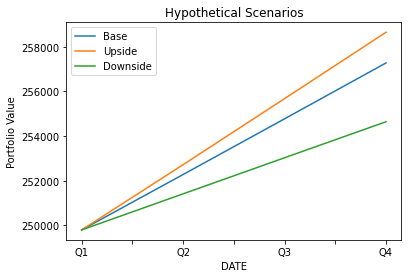

In [171]:
portfolio_value.plot()
plt.title('Hypothetical Scenarios')
plt.xlabel('DATE')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()